In [1]:
from utils import *
import matplotlib.pyplot as plt

In [ ]:
A = syntheticA(175)  
p = 1/3
B = 10
mu, n = Y.shape
I = bernoulli(mu, n, p)
# I is a M x 2 tensor of index pairs generated by bernoulli or whatever
X = I + torch.rand(len(I), 2)
# Function on the jittered positions will make the observed data
# Try to recover the matrix from the original positions I though!
F = syntheticf(X/n)

In [7]:
# SGD synthetic continuous using jittered I
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=16)
res_sgd_syn_cX = optimise_f(optimiser, params, F, X, Y, B, dk=2500, K=2500)

2499, 2489, 1.1141278264403809e-05


In [8]:
# SGD synthetic continuous with I
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=16)
res_sgd_syn_cI = optimise_f(optimiser, params, F, I, Y, B, dk=2500, K=2500)

2499, 1018, 0.008568833582103252


In [9]:
# Adam synthetic continuous using I
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=0.01)
res_adam_syn_cI = optimise_f(optimiser, params, F, I, Y, B, dk=2500, K=2500)

2499, 568, 0.008580191060900688


In [10]:
# Adam synthetic continuous with jittered I
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=0.01)
res_adam_syn_cX = optimise_f(optimiser, params, F, X, Y, B, dk=2500, K=2500)

2499, 2153, 1.1157485459989402e-05


In [11]:
# ASD synthetic with I.
U,W = initial(mu, n, 2) 
res_asd_syn_cI = asd_f(U,W,F,Y,I,B,dk=2500,K=2500)

2499, 2491, 0.008884085342288017


In [12]:
# ASD synthetic with X.
U,W = initial(mu, n, 2) 
res_asd_syn_cX = asd_f(U,W,F,Y,X,B,dk=2000,K=2000)

1999, 159, 1.1486109542602208e-05


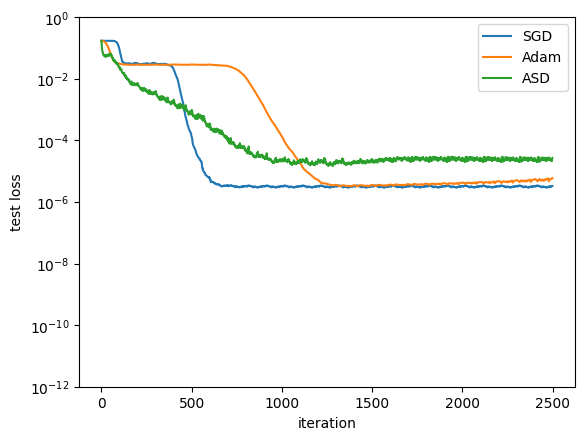

In [57]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-12, 1))
plt.xlabel('iteration')
plt.ylabel('test loss')
plt.savefig("syn_cont_test")

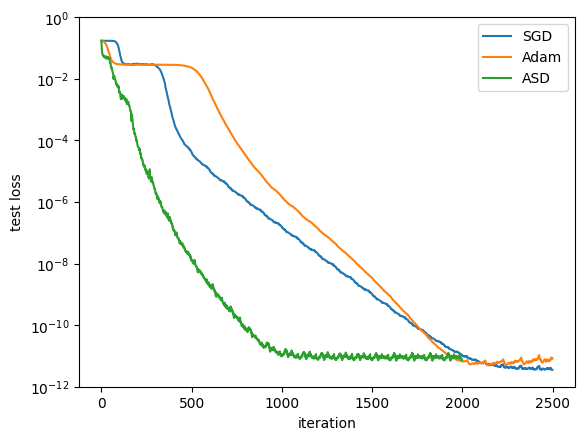

In [58]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-12, 1))
plt.xlabel('iteration')
plt.ylabel('test loss')
plt.savefig("syn_cont_test_x")

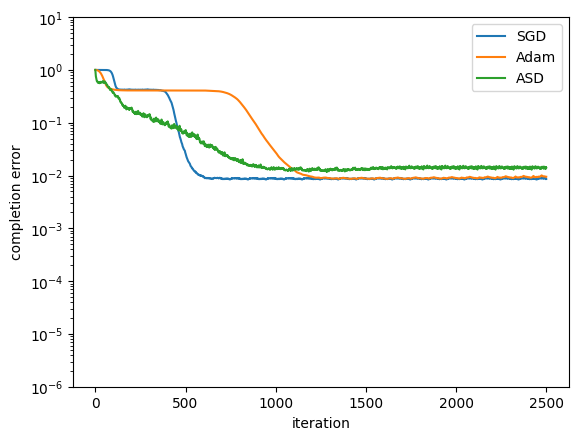

In [70]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-6, 1e1))
plt.xlabel('iteration')
plt.ylabel('completion error')
plt.savefig("syn_cont_err")

Text(0, 0.5, 'completion error')

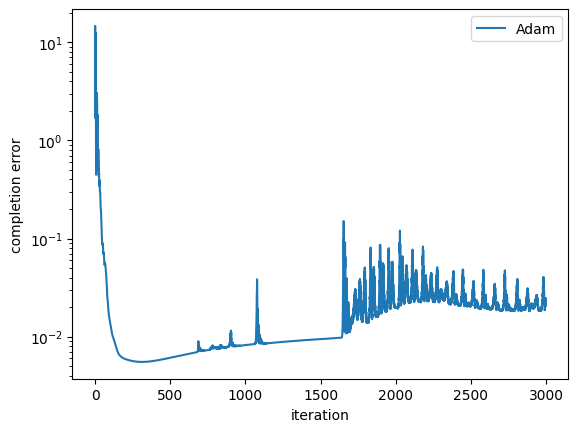

In [11]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-6, 1e1))
plt.xlabel('iteration')
plt.ylabel('completion error')
plt.savefig("syn_cont_err_x")

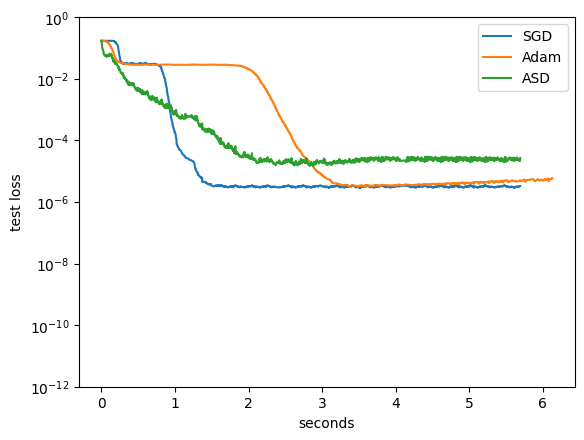

In [ ]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_syn_cI["timestamps"]) - res_sgd_syn_cI["timestamps"][0], res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_cI["timestamps"]) - res_adam_syn_cI["timestamps"][0], res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_cI["timestamps"]) - res_asd_syn_cI["timestamps"][0], res_asd_syn_cI[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-12, 1))
plt.xlabel('seconds')
plt.ylabel('test loss')
plt.savefig("syn_cont_test_time")

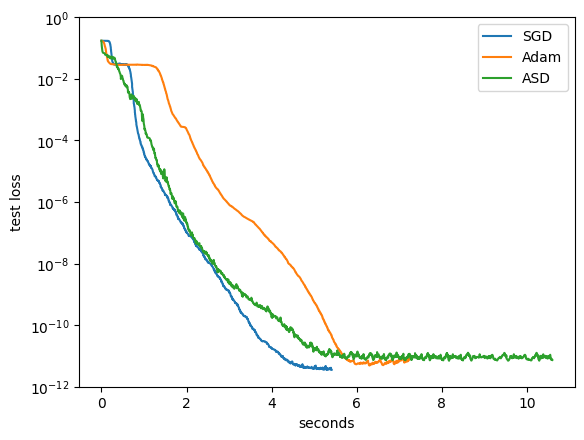

In [64]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_syn_cX["timestamps"]) - res_sgd_syn_cX["timestamps"][0], res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_cX["timestamps"]) - res_adam_syn_cX["timestamps"][0], res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_cX["timestamps"]) - res_asd_syn_cX["timestamps"][0], res_asd_syn_cX[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-12, 1))
plt.xlabel('seconds')
plt.ylabel('test loss')
plt.savefig("syn_cont_test_x_time")

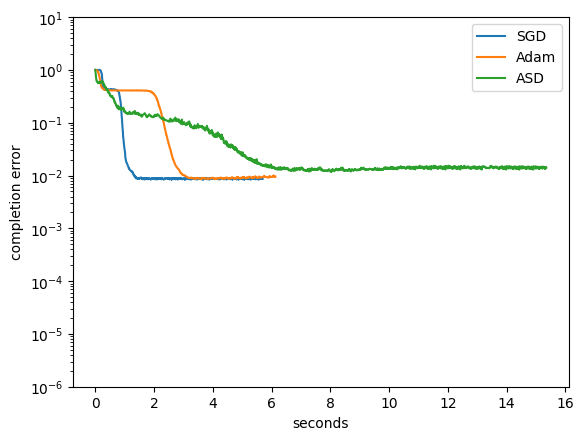

In [68]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn_cI["timestamps"]) - res_sgd_syn_cI["timestamps"][0], res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_cI["timestamps"]) - res_adam_syn_cI["timestamps"][0], res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_cI["timestamps"]) - res_asd_syn_cI["timestamps"][0], res_asd_syn_cI[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-6, 1e1))
plt.xlabel('seconds')
plt.ylabel('completion error')
plt.savefig("syn_cont_err_time")

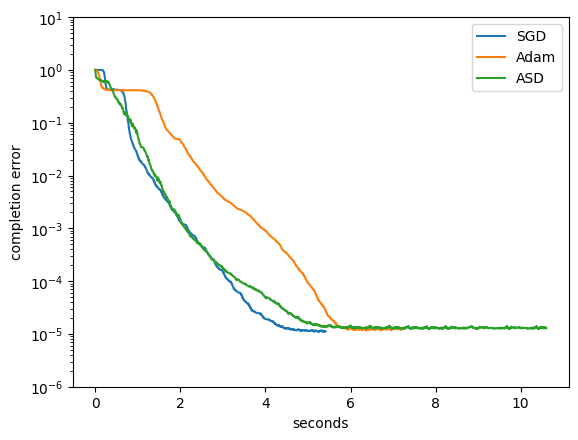

In [ ]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn_cX["timestamps"]) - res_sgd_syn_cX["timestamps"][0], res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_cX["timestamps"]) - res_adam_syn_cX["timestamps"][0], res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_cX["timestamps"]) - res_asd_syn_cX["timestamps"][0], res_asd_syn_cX[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.ylim((1e-6, 1e1))
plt.xlabel('seconds')
plt.ylabel('completion error')
plt.savefig("syn_cont_err_x_time")

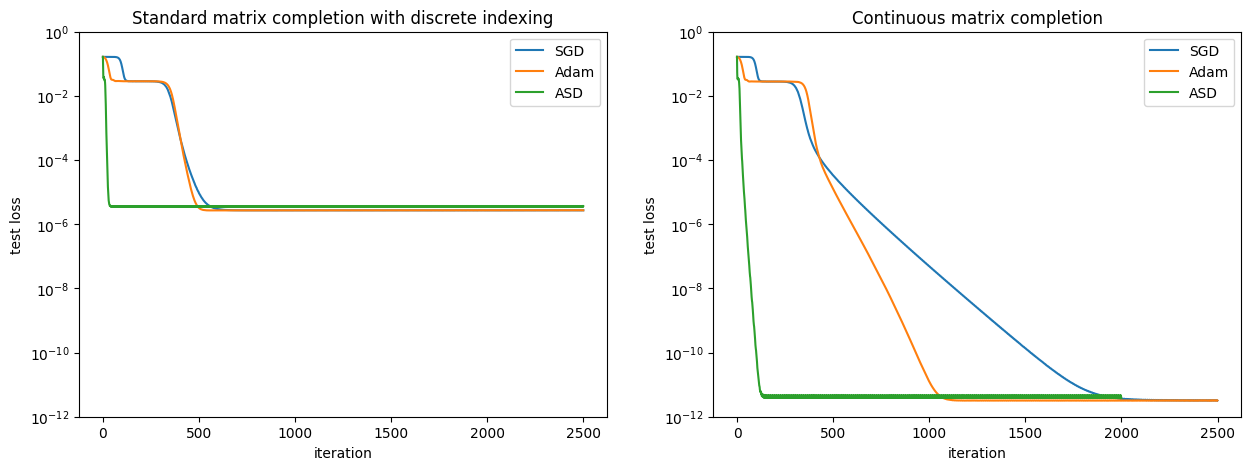

In [14]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-12, 1))

ax = fig.add_subplot(1,2,2)
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")
ax.set_ylim((1e-12, 1))

fig.savefig("syn_cont_test")

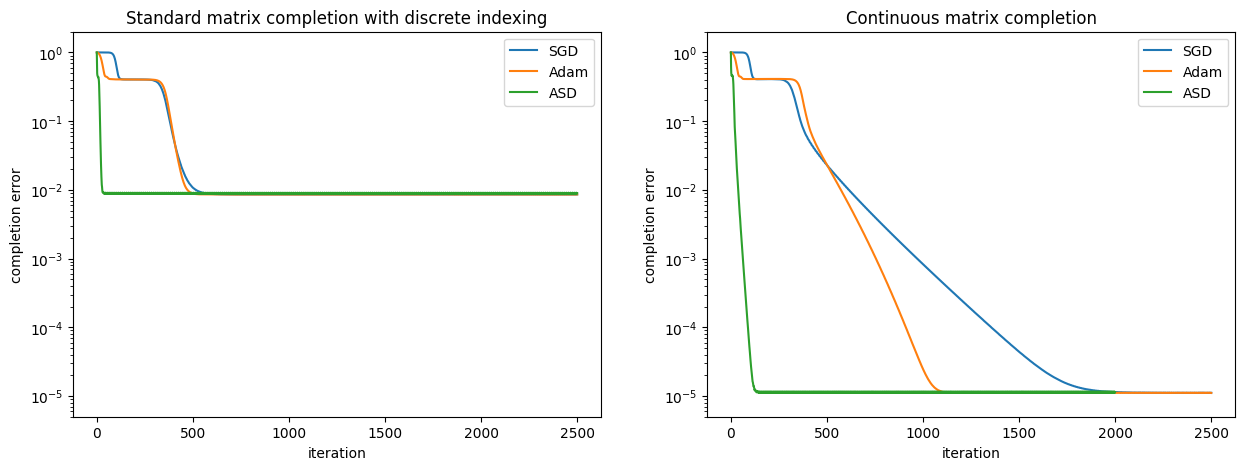

In [15]:
loss_str = "true_err_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(res_sgd_syn_cI[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cI[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cI[loss_str], label="ASD")
ax.set_title(f"Standard matrix completion with discrete indexing")
ax.legend(loc="upper right")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

ax = fig.add_subplot(1,2,2)
plt.semilogy(res_sgd_syn_cX[loss_str], label="SGD")
plt.semilogy(res_adam_syn_cX[loss_str], label="Adam")
plt.semilogy(res_asd_syn_cX[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"Continuous matrix completion")
ax.set_xlabel("iteration")
ax.set_ylabel("completion error")
ax.set_ylim((5e-6, 2))

fig.savefig("syn_cont_err")

In [3]:
Y = syntheticY(175)  
p = 1/3
B = 1
mu, n = Y.shape
I = bernoulli(mu, n, p)

In [6]:
# SGD learning rate
data = []
lr_list = [256]
for i in lr_list:
    params = initial(mu, n, 2) 
    optimiser = torch.optim.SGD(params, lr=i) #32
    res_sgd_syn = optimise(optimiser, params, Y, I, B, dk=1000, K=10000)
    data.append(res_sgd_syn)
   

1033, 38, 0.23446732759475708


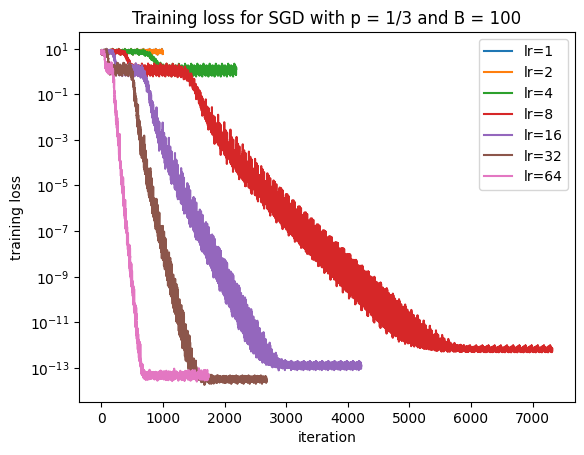

In [26]:
# Test loss against iteration.
for i in range(len(data)):
    plt.semilogy(data[i]["train_loss_list"], label=f"lr={2**i}")
plt.title("Training loss for SGD with p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("training loss")
# plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_train")

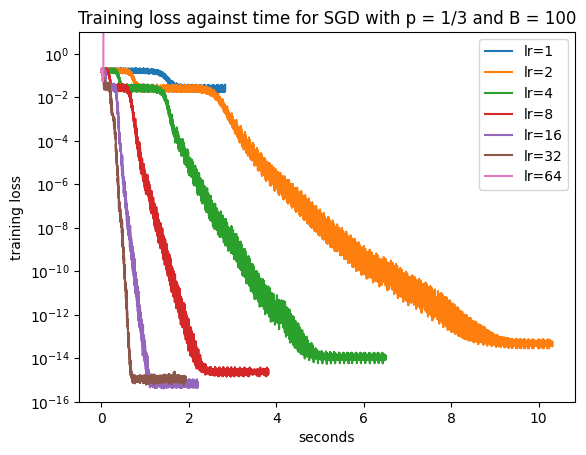

In [40]:
for i in range(len(data)):
    times = np.array(data[i]["timestamps"])
    times -= times[0]
    plt.semilogy(times, data[i]["train_loss_list"], label=f"lr={2**i}")
plt.title("Training loss against time for SGD with p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("training loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_train_time")

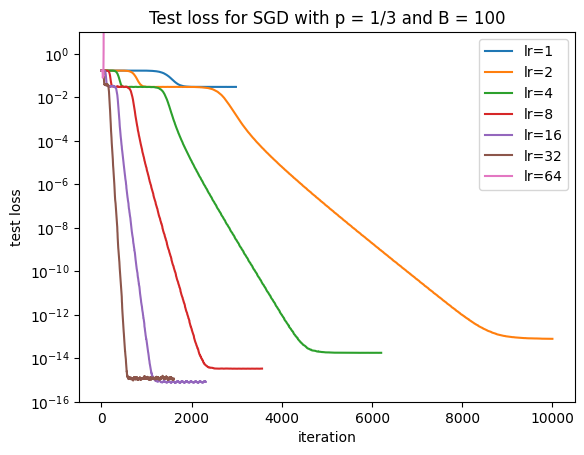

In [41]:
# Test loss against iteration.
for i in range(len(data)):
    plt.semilogy(data[i]["test_loss_list"], label=f"lr={2**i}")
plt.title("Test loss for SGD with p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_test")

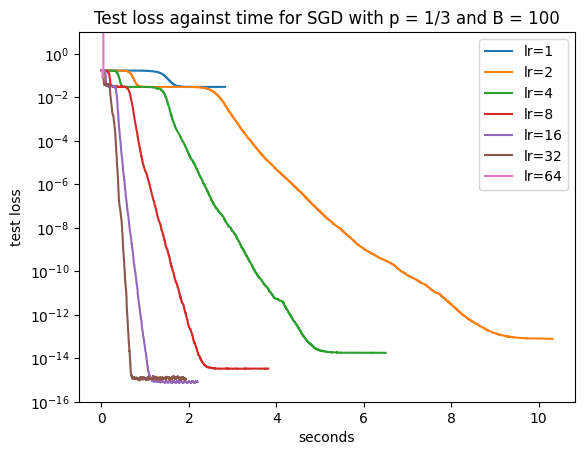

In [42]:
for i in range(len(data)):
    times = np.array(data[i]["timestamps"])
    times -= times[0]
    plt.semilogy(times, data[i]["test_loss_list"], label=f"lr={2**i}")
plt.title("Test loss against time for SGD with p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.ylim((1e-16,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_test_time")

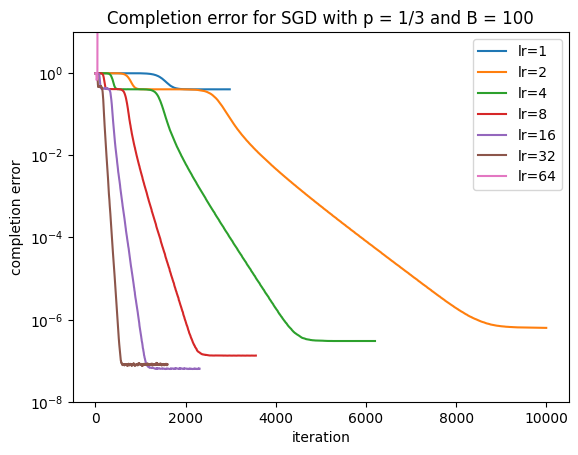

In [43]:
for i in range(len(data)):
    plt.semilogy(data[i]["true_err_list"], label=f"lr={2**i}")
plt.title("Completion error for SGD with p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.ylim((1e-8,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_err")

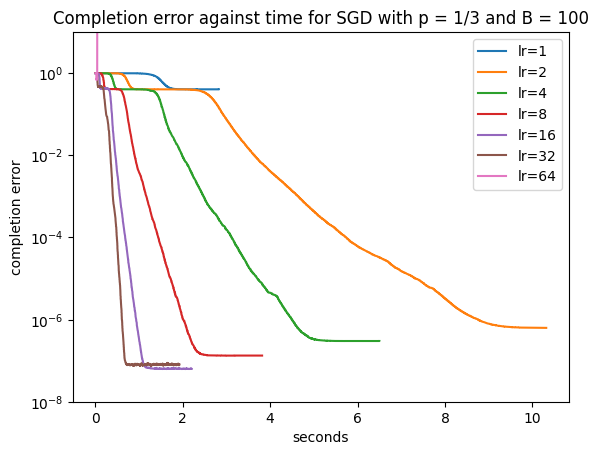

In [44]:
for i in range(len(data)):
    times = np.array(data[i]["timestamps"])
    times -= times[0]
    plt.semilogy(times, data[i]["true_err_list"], label=f"lr={2**i}")
plt.title("Completion error against time for SGD with p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.ylim((1e-8,1e1))
plt.legend(loc="upper right")
plt.savefig("sgd_lr_err_time")

In [17]:
# Adam synthetic
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=0.02)
res_adam_syn = optimise(optimiser, params, Y, I, B, dk=1000, K=5000)

1814, 1297, 2.7209071049583144e-06


In [11]:
# SGD synthetic
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=32) #32
res_sgd_syn = optimise(optimiser, params, Y, I, B, dk=500, K=5000)

1506, 1052, 1.833371783277471e-07


In [12]:
# ASD synthetic.
U,W = initial(mu, n, 2) 
res_asd_syn = asd_1(U,W,Y,I,B,dk=1000,K=5000)

1192, 597, 7.258193335246688e-08


Text(0, 0.5, 'test loss')

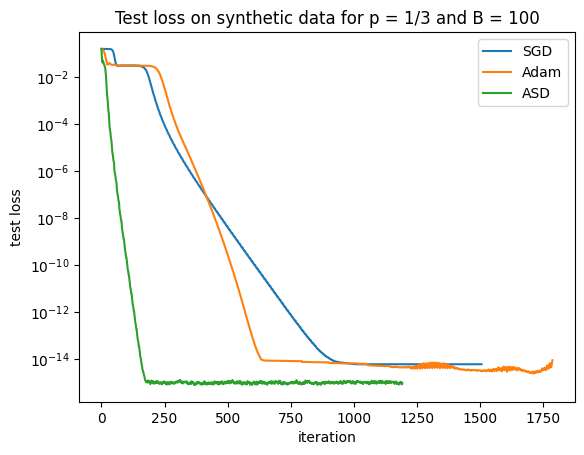

In [13]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_syn[loss_str], label="SGD")
plt.semilogy(res_adam_syn[loss_str], label="Adam")
plt.semilogy(res_asd_syn[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on synthetic data for p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("test loss")
# plt.savefig("syn_test_b100")

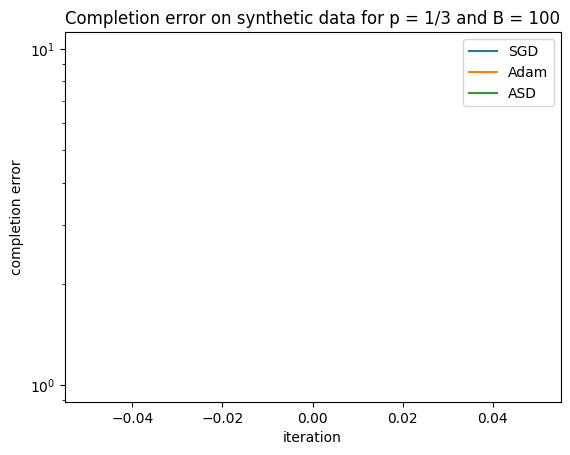

In [14]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_syn[loss_str], label="SGD")
plt.semilogy(res_adam_syn[loss_str], label="Adam")
plt.semilogy(res_asd_syn[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on synthetic data for p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("syn_err_b100")

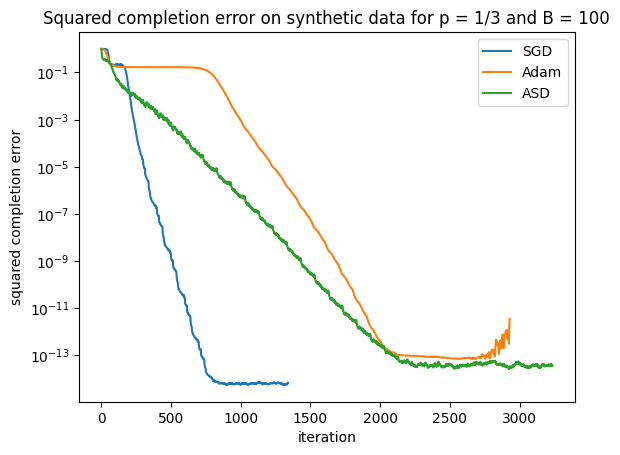

In [80]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn[loss_str])**2, label="SGD")
plt.semilogy(np.array(res_adam_syn[loss_str])**2, label="Adam")
plt.semilogy(np.array(res_asd_syn[loss_str])**2, label="ASD")
plt.legend(loc="upper right")
plt.title("Squared completion error on synthetic data for p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("squared completion error")
plt.savefig("syn_err_2_b100")

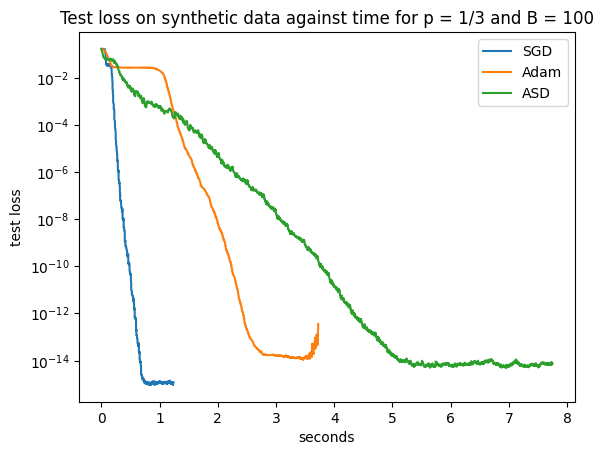

In [81]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_syn["timestamps"]) - res_sgd_syn["timestamps"][0], res_sgd_syn[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn["timestamps"]) - res_adam_syn["timestamps"][0], res_adam_syn[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn["timestamps"]) - res_asd_syn["timestamps"][0], res_asd_syn[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on synthetic data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("syn_test_b100_time")

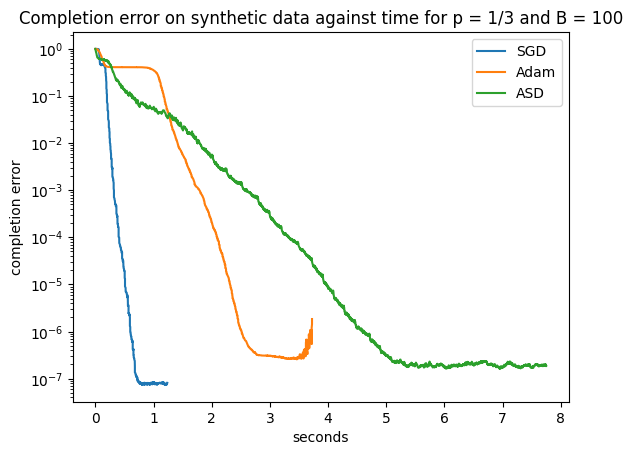

In [82]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn["timestamps"]) - res_sgd_syn["timestamps"][0], res_sgd_syn[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn["timestamps"]) - res_adam_syn["timestamps"][0], res_adam_syn[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn["timestamps"]) - res_asd_syn["timestamps"][0], res_asd_syn[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on synthetic data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("syn_err_b100_time")

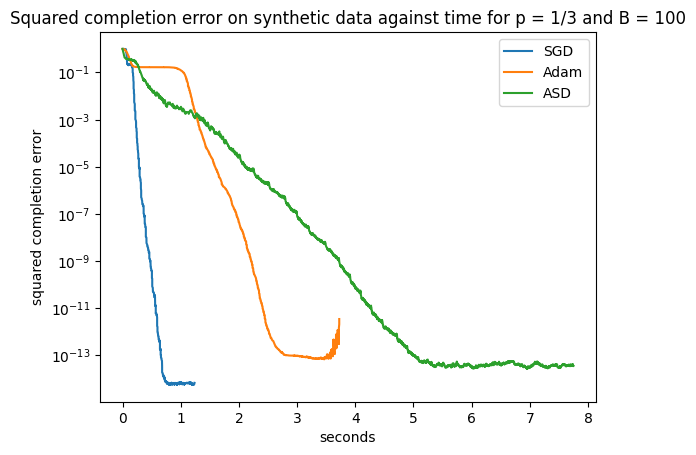

In [83]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn["timestamps"]) - res_sgd_syn["timestamps"][0], np.array(res_sgd_syn[loss_str])**2, label="SGD")
plt.semilogy(np.array(res_adam_syn["timestamps"]) - res_adam_syn["timestamps"][0], np.array(res_adam_syn[loss_str])**2, label="Adam")
plt.semilogy(np.array(res_asd_syn["timestamps"]) - res_asd_syn["timestamps"][0], np.array(res_asd_syn[loss_str])**2, label="ASD")
plt.legend(loc="upper right")
plt.title("Squared completion error on synthetic data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("squared completion error")
plt.savefig("syn_err_2_b100_time")

In [5]:
B = 1

In [7]:
# Adam synthetic 1 batch
params = initial(mu, n, 2) 
optimiser = torch.optim.Adam(params, lr=1)
res_adam_real = optimise(optimiser, params, Y, I, B, dk=100, K=600)

494, 456, 5.967451244259792e-08


In [8]:
# SGD synthetic
params = initial(mu, n, 2) 
optimiser = torch.optim.SGD(params, lr=128)
res_sgd_real = optimise(optimiser, params, Y, I, B, dk=100, K=600)

272, 172, 1.5140750520004076e-07


In [9]:
# ASD synthetic.
U,W = initial(mu, n, 2) 
res_asd_real = asd_1(U,W,Y,I,B,dk=100,K=500)#, lr=24)

153, 62, 6.152914977519686e-08


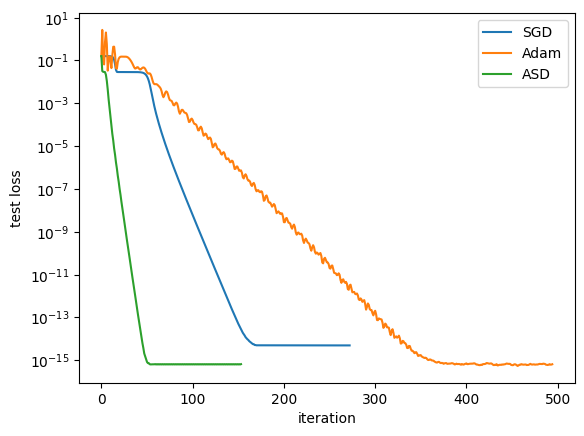

In [10]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
# plt.title("Test loss on synthetic data for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("syn_test_b1")

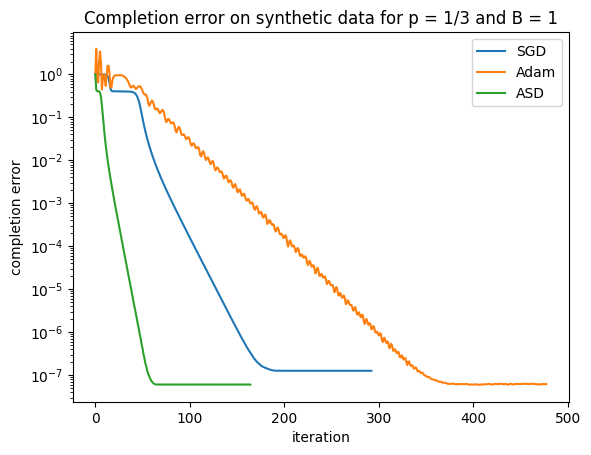

In [ ]:
plt.subplot(1,2,1)
loss_str = "true_err_list"
plt.semilogy(np.arrayres_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on synthetic data for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("syn_err_b1")

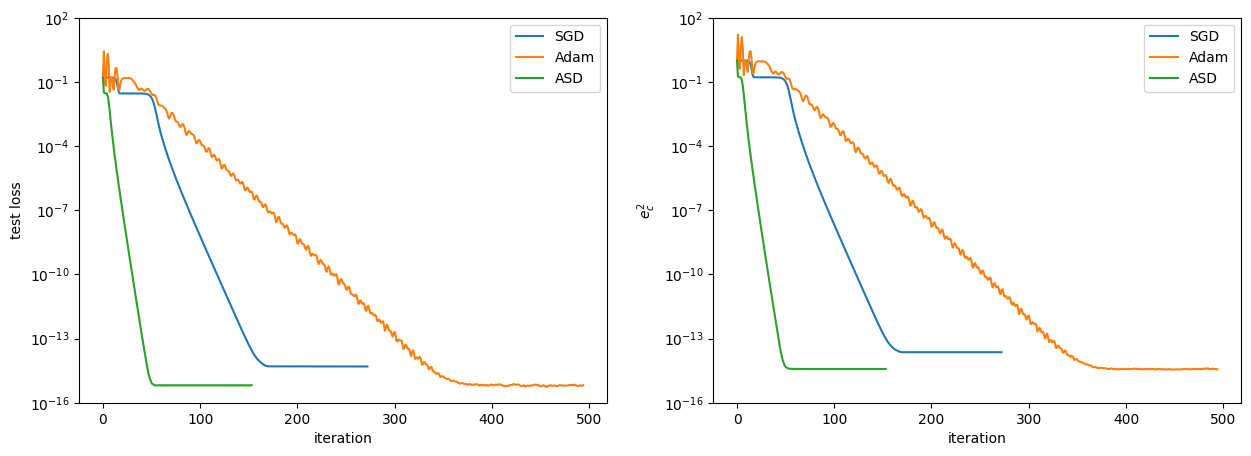

In [17]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,2,1)
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
# plt.title("Test loss on synthetic data for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.ylim((1e-16, 1e2))
plt.savefig("syn_test_b1")

plt.subplot(1,2,2)
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_real[loss_str])**2, label="SGD")
plt.semilogy(np.array(res_adam_real[loss_str])**2, label="Adam")
plt.semilogy(np.array(res_asd_real[loss_str])**2, label="ASD")
plt.legend(loc="upper right")
# plt.title("Squared completion error on synthetic data against iteration for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel(r"$e_{c}^{2}$")
plt.ylim((1e-16, 1e2))
plt.savefig("syn_compare")

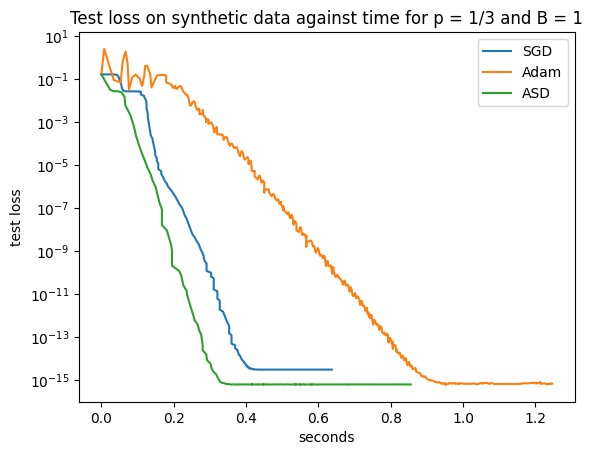

In [60]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_syn_b1["timestamps"]) - res_sgd_syn_b1["timestamps"][0], res_sgd_syn_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_b1["timestamps"]) - res_adam_syn_b1["timestamps"][0], res_adam_syn_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_b1["timestamps"]) - res_asd_syn_b1["timestamps"][0], res_asd_syn_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on synthetic data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("syn_test_b1_time")

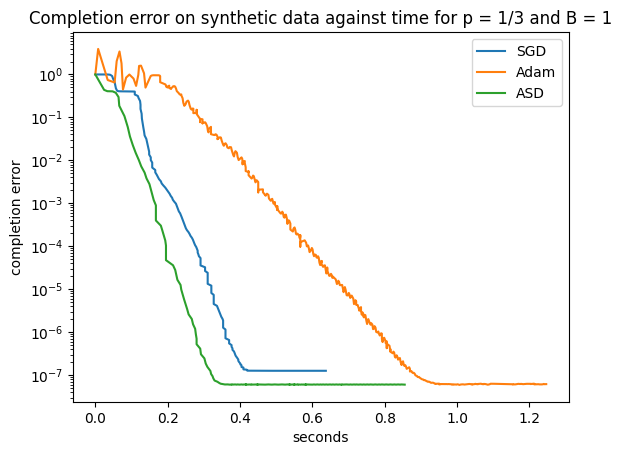

In [61]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn_b1["timestamps"]) - res_sgd_syn_b1["timestamps"][0], res_sgd_syn_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_syn_b1["timestamps"]) - res_adam_syn_b1["timestamps"][0], res_adam_syn_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_syn_b1["timestamps"]) - res_asd_syn_b1["timestamps"][0], res_asd_syn_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on synthetic data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("syn_err_b1_time")

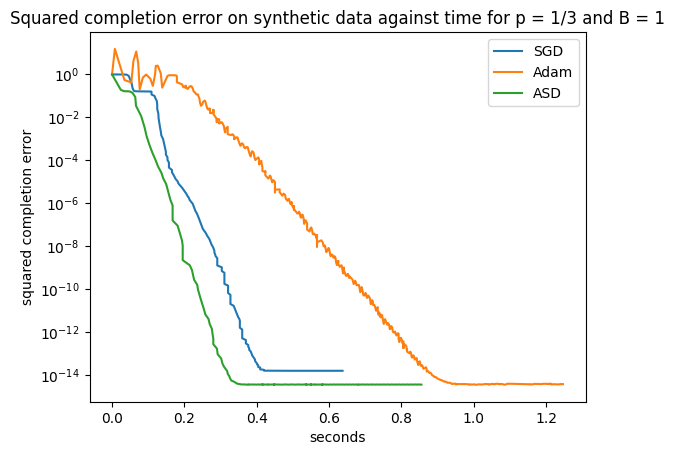

In [62]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_syn_b1["timestamps"]) - res_sgd_syn_b1["timestamps"][0], np.array(res_sgd_syn_b1[loss_str])**2, label="SGD")
plt.semilogy(np.array(res_adam_syn_b1["timestamps"]) - res_adam_syn_b1["timestamps"][0], np.array(res_adam_syn_b1[loss_str])**2, label="Adam")
plt.semilogy(np.array(res_asd_syn_b1["timestamps"]) - res_asd_syn_b1["timestamps"][0], np.array(res_asd_syn_b1[loss_str])**2, label="ASD")
plt.legend(loc="upper right")
plt.title("Squared completion error on synthetic data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("squared completion error")
plt.savefig("syn_err_2_b1_time")

In [ ]:
# Rank test: rank 5 has best completion error
adam_syn_list = []

for i in range(1,21):
    params = initial(mu, n, i) 
    optimiser = torch.optim.Adam(params, lr=0.01)
    res = optimise(optimiser, params, Y, I, B, dk=1000, K=4000)
    adam_syn_list.append(res)

1171, 261, 0.40734347701072693
3039, 2833, 2.4745693849581585e-07
2339, 1535, 7.119840302038938e-05
2110, 1246, 7.03280747984536e-05
1936, 1066, 0.0001146913054981269
1812, 1046, 0.000128049825434573
1749, 945, 0.0001328494108747691
1636, 846, 0.00016734484233893454
1559, 848, 0.00024691075668670237
1541, 894, 0.00013331173977348953
1479, 824, 0.00015597825404256582
1450, 793, 0.00017435368499718606
1437, 844, 0.00027899869019165635
1388, 763, 0.0002572637749835849
1370, 844, 0.00029588324832729995
1346, 750, 0.0003423084563110024
1337, 793, 0.0004298204439692199
1322, 728, 0.00038667843909934163
1305, 744, 0.0006707497523166239
1311, 728, 0.0005350329447537661
1297, 751, 0.0007170253084041178
1269, 596, 0.0016822711331769824
1272, 644, 0.0012133383424952626
1272, 596, 0.0020406770054250956
1270, 596, 0.0023778860922902822


In [ ]:
# Rank test: rank 10 has best completion error
sgd_syn_list = []

for i in range(1, 21):
    params = initial(mu, n, i) 
    optimiser = torch.optim.SGD(params, lr=32)
    res = optimise(optimiser, params, Y, I, B, dk=500, K=4000)
    sgd_syn_list.append(res)

570, 526, 0.4476442039012909
1130, 786, 7.655641809378722e-08
983, 803, 5.208310994930798e-06
999, 846, 5.845993200637167e-06
973, 886, 7.939843271742575e-06
967, 926, 9.61437945079524e-06
959, 900, 8.876820174918976e-06
949, 919, 1.1818466191471089e-05
950, 902, 1.417226576450048e-05
949, 800, 1.5839541447348893e-05
949, 694, 1.2934911865158938e-05
949, 681, 1.341724691883428e-05
964, 696, 1.5824067304492928e-05
949, 501, 1.7839682186604477e-05
950, 895, 1.3952590052213054e-05
954, 900, 1.9054830772802234e-05
955, 896, 1.6574836990912445e-05
949, 700, 1.8831007764674723e-05
952, 899, 1.855616574175656e-05
949, 901, 2.0802559447474778e-05
949, 896, 2.1640229533659294e-05
949, 900, 2.57562605838757e-05
949, 900, 2.191594467149116e-05
949, 900, 2.2467816961579956e-05
949, 899, 2.3688440705882385e-05


In [ ]:
asd_syn_list = []

for i in range(1,21):
    U,W = initial(mu, n, i) 
    res = asd(U, W, Y, I, B, 500, K=4000)
    asd_syn_list.append(res)

514, 442, 0.5643670558929443
3999, 3972, 1.7765560755833576e-07
3999, 3971, 0.0003763399727176875
3999, 3982, 0.0035030001308768988
3999, 3922, 0.010556095279753208
2752, 2628, 0.02817692793905735
1304, 1128, 0.07353483885526657
3999, 3997, 0.03619428724050522
2775, 2677, 0.09723111987113953
3999, 3972, 0.048273324966430664
3999, 3988, 0.061924953013658524
3999, 3951, 0.06941407918930054
3999, 3940, 0.0925067588686943
3999, 3985, 0.09437298774719238
3999, 3960, 0.08385711163282394
3999, 3972, 0.1099560484290123
3999, 3986, 0.06966456770896912
2003, 1972, 0.06813684105873108
1430, 1387, 0.09638629108667374
3999, 3985, 0.08747070282697678
1492, 1472, 0.12132465839385986
3999, 3980, 0.10342413187026978
3999, 3997, 0.10134589672088623
3999, 3987, 0.10264288634061813
1413, 1386, 0.16014641523361206


In [5]:
asd_syn_list = []

for B in [1, 10, 20, 40, 80]:
    U,W = initial(mu, n, 2) 
    res = asd_2(U, W, Y, I, B, 500, K=4000)
    asd_syn_list.append(res)

554, 112, 5.8546852699237206e-08
644, 328, 6.89789061425472e-08
784, 682, 7.469840568319341e-08
694, 536, 9.131014166996465e-08
978, 964, 1.202409833922502e-07


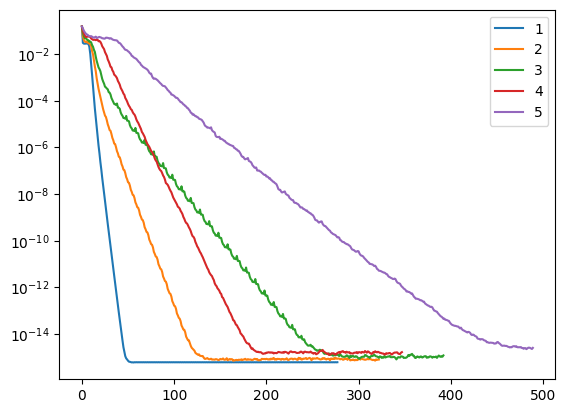

In [6]:
for i in range(len(asd_syn_list)):
    plt.semilogy(asd_syn_list[i]["test_loss_list"], label=f"{i+1}")
plt.legend(loc="upper right")

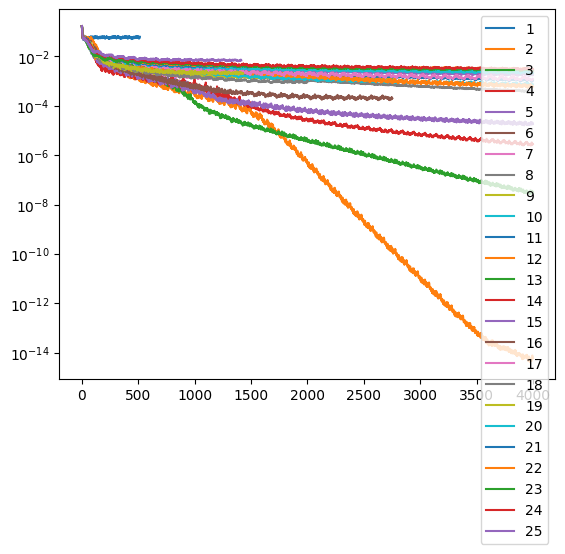

In [ ]:
for i in range(len(asd_syn_list)):
    plt.semilogy(asd_syn_list[i]["test_loss_list"], label=f"{i+1}")
plt.legend(loc="upper right")

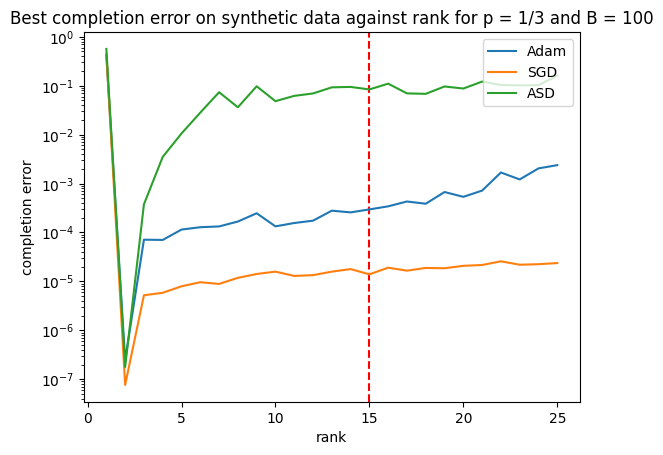

In [ ]:
# Best test loss as a function of rank.
data = []
for res in adam_syn_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.semilogy(np.arange(1,21),np.array(data), label="Adam")

data = []
for res in sgd_syn_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.plot(np.arange(1,21),np.array(data), label="SGD")

data = []
for res in asd_syn_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.plot(np.arange(1,21),np.array(data), label="ASD")

plt.title("Best completion error on synthetic data against rank for p = 1/3 and B = 100")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("syn_rank_err_b100")

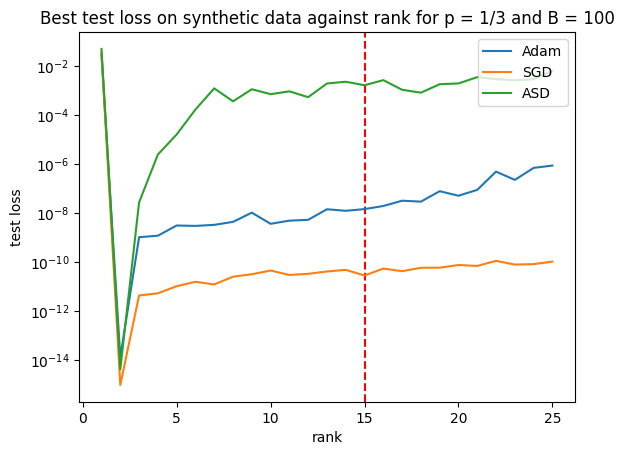

In [ ]:
# Best test loss as a function of rank.
data = []
for res in adam_syn_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,21),np.array(data), label="Adam")

data = []
for res in sgd_syn_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,21),np.array(data), label="SGD")

data = []
for res in asd_syn_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,21),np.array(data), label="ASD")

plt.title("Best test loss on synthetic data against rank for p = 1/3 and B = 100")
plt.xlabel("rank")
plt.ylabel("test loss")
plt.legend(loc="upper right")
plt.savefig("syn_rank_test_b100")

In [98]:
# Rank test: rank 5 has best completion error
adam_b1_list = []

for i in range(1,26):
    params = initial(mu, n, i) 
    optimiser = torch.optim.Adam(params, lr=0.99)
    res = optimise(optimiser, params, Y, I, 1, dk=200, K=1000)
    adam_b1_list.append(res)

262, 63, 0.40466436743736267
569, 414, 6.153350540216707e-08
999, 999, 0.00011542032734723762
999, 999, 0.0002772690786514431
999, 999, 0.000562307657673955
999, 999, 0.0004390816611703485
999, 999, 0.0005763991503044963
999, 999, 0.0010914918966591358
999, 999, 0.0019118876662105322
999, 999, 0.0014266183134168386
999, 999, 0.002397219417616725
999, 999, 0.0011590642388910055
999, 999, 0.000650840753223747
999, 999, 0.0019121437799185514
999, 999, 0.0013912176946178079
999, 999, 0.0008183640311472118
481, 481, 0.00018968341464642435
496, 496, 0.00028121142531745136
999, 999, 0.003876499831676483
999, 999, 0.003969775978475809
474, 277, 0.00021918184938840568
999, 999, 0.0004834256542380899
999, 999, 0.00243738922290504
999, 999, 0.0008700620383024216
999, 999, 0.0008908816380426288


In [ ]:
# Rank test: rank 10 has best completion error
sgd_b1_list = []

for i in range(1, 26):
    params = initial(mu, n, i) 
    optimiser = torch.optim.SGD(params, lr=32)
    res = optimise(optimiser, params, Y, I, 1, dk=200, K=1000)
    sgd_b1_list.append(res)

268, 82, 0.4045288860797882
823, 636, 7.520623057644116e-07
764, 759, 4.949333379045129e-05
756, 661, 1.8473860109224916e-05
766, 754, 1.5051156879053451e-05
765, 765, 1.4071428267925512e-05
744, 743, 1.883093500509858e-05
755, 754, 1.744815381243825e-05
760, 741, 1.9885656001861207e-05
764, 741, 2.1133448171894997e-05
760, 743, 1.510287620476447e-05
758, 757, 2.1183759599807672e-05
745, 688, 2.140629294444807e-05
740, 740, 2.579487772891298e-05
747, 727, 2.8964712328161113e-05
741, 741, 2.546153700677678e-05
719, 719, 3.5282551834825426e-05
742, 742, 3.0545281333616003e-05
731, 728, 3.751406984520145e-05
736, 718, 2.7153151677339338e-05
744, 736, 3.148482574033551e-05
709, 667, 3.513865885906853e-05
734, 719, 3.056662535527721e-05
731, 731, 3.352743442519568e-05
735, 735, 3.0874904041411355e-05


In [101]:
asd_b1_list = []

for i in range(1,26):
    U,W = initial(mu, n, i) 
    res = asd(U, W, Y, I, 1, 200, K=1000)
    asd_b1_list.append(res)

202, 12, 0.40474769473075867
253, 66, 6.025385346219991e-08
385, 191, 7.180419459018594e-08
446, 246, 9.051015581462707e-08
646, 455, 8.089413938705547e-08
699, 525, 9.179204596421187e-08
605, 446, 1.2674095728471002e-07
927, 733, 1.1911534869568641e-07
999, 866, 1.4692071204081003e-07
999, 995, 1.791095343151028e-07
999, 999, 1.2443020978025743e-06
999, 996, 2.42250820292611e-07
999, 999, 8.307032430820982e-07
999, 999, 8.511491387253045e-07
999, 999, 3.0778744530834956e-06
999, 999, 3.0786495699430816e-06
999, 999, 1.9283692381577566e-05
999, 999, 1.9438515664660372e-05
999, 999, 0.00018741861276794225
999, 999, 0.00020224295440129936
999, 999, 0.0012168658431619406
999, 999, 0.00022500786872114986
999, 999, 0.00021049263887107372
999, 999, 0.0034264307469129562
999, 999, 0.0018832789501175284


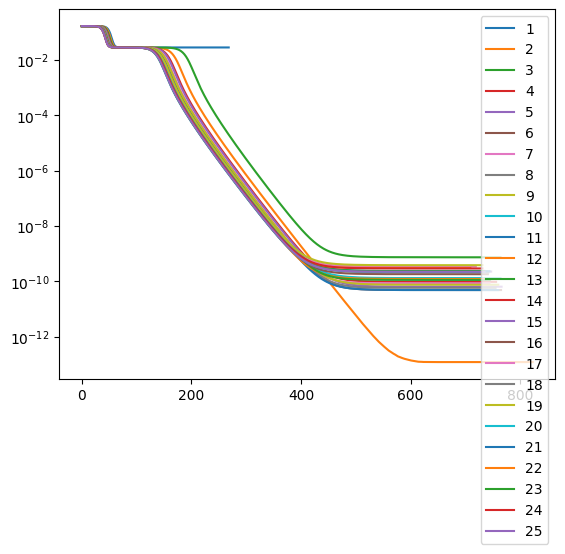

In [113]:
for i in range(len(sgd_b1_list)):
    plt.semilogy(sgd_b1_list[i]["test_loss_list"], label=f"{i+1}")
plt.legend(loc="upper right")

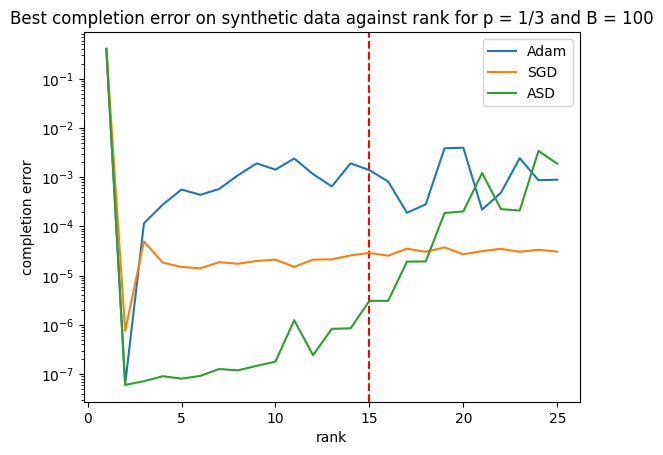

In [108]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

data = []
for res in adam_b1_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.semilogy(np.arange(1,26),np.array(data), label="Adam")

data = []
for res in sgd_b1_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.plot(np.arange(1,26),np.array(data), label="SGD")

data = []
for res in asd_b1_list:
    U, W = res["best_params"]
    data.append(completion_err(U,W,Y))
plt.plot(np.arange(1,26),np.array(data), label="ASD")

plt.title("Best completion error on synthetic data against rank for p = 1/3 and B = 100")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("syn_rank_err_b1")

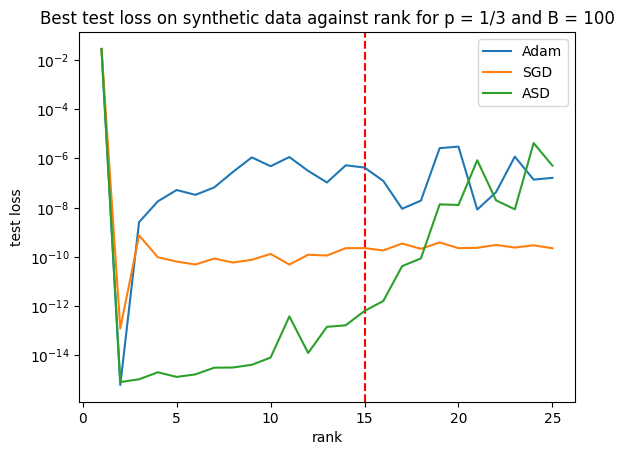

In [107]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

data = []
for res in adam_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,26),np.array(data), label="Adam")

data = []
for res in sgd_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,26),np.array(data), label="SGD")

data = []
for res in asd_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.semilogy(np.arange(1,26),np.array(data), label="ASD")

plt.title("Best test loss on synthetic data against rank for p = 1/3 and B = 100")
plt.xlabel("rank")
plt.ylabel("test loss")
plt.legend(loc="upper right")
plt.savefig("syn_rank_test_b1")

In [2]:
file = np.load("CW2.npz")
A = torch.tensor(file["Y"], dtype=torch.float32)
A = A.reshape((25**2, 49))
r = 5
p = 1/3
B = 10
I = bernoulli(A, p)

In [3]:
# Adam real data
X, Y = initial(A, r) 
res_adam_real_b10 = optimise(X, Y, A, I, "adam", lr=0.02, B=B, dk=3000, K=3000, k_test=50)

Best mean completion error: 0.04521547257900238


In [4]:
# SGD real data.
X, Y = initial(A, r) 
res_sgd_real_b10 = optimise(X, Y, A, I, lr=32, B=B, dk=3000, K=3000, k_test=50)

Best mean completion error: 0.046795014292001724


In [13]:
# ASD real data.
X, Y = initial(A, r) 
res_asd_real_b10 = asd1(X, Y, A, I, 10, dk=3000, K=500)

Best mean completion error: 0.06404286623001099


In [34]:
# Adam real data
params = initial(mu, n, r) 
optimiser = torch.optim.Adam(params, lr=0.02)
res_adam_real_b1 = optimise(optimiser, params, Y, I, 1, dk=3000, K=3000)

2999, 1268, 0.04275202006101608


In [35]:
# SGD real data.
params = initial(mu, n, r) 
optimiser = torch.optim.SGD(params, lr=32)
res_sgd_real_b1 = optimise(optimiser, params, Y, I, 1, dk=3000, K=3000)

2999, 1253, 0.04085070267319679


In [36]:
# ASD real data.
U,W = initial(mu, n, r) 
res_asd_real_b1 = asd_2(U,W,Y,I,1,dk=3000,K=3000)

2999, 446, 0.043034400790929794


Text(0, 0.5, 'test loss')

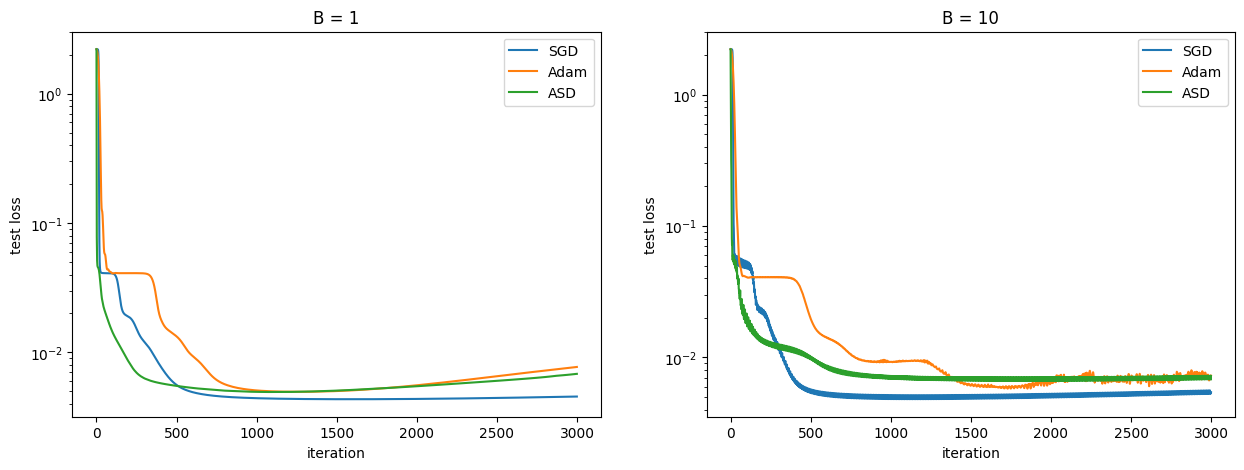

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.semilogy(res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(res_sgd_real_b10[loss_str], label="SGD")
ax.semilogy(res_adam_real_b10[loss_str], label="Adam")
ax.semilogy(res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

# fig.savefig("real_test_batch")

Text(0, 0.5, 'test loss')

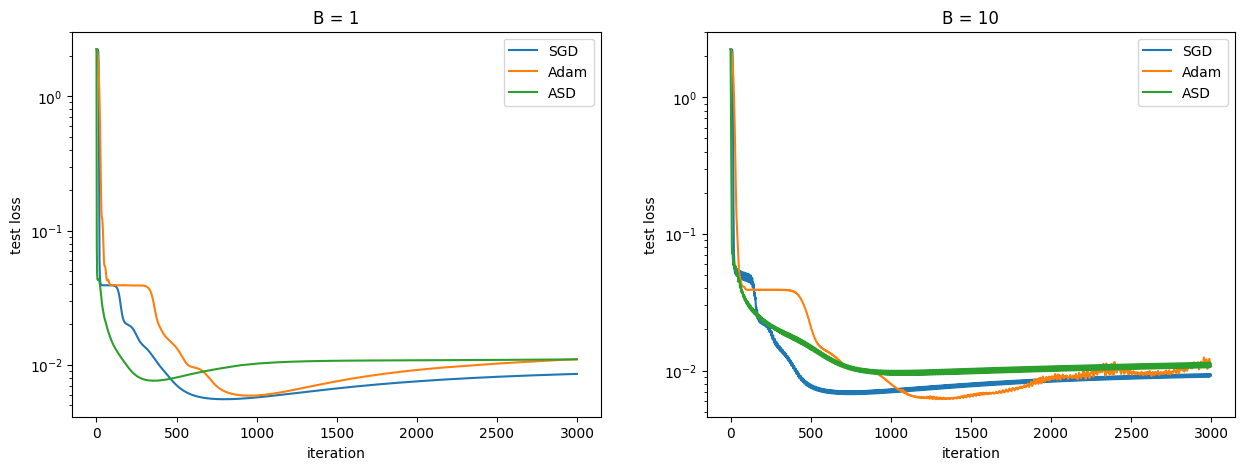

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.semilogy(res_sgd_real_b1[loss_str], label="SGD")
ax.semilogy(res_adam_real_b1[loss_str], label="Adam")
ax.semilogy(res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

ax = fig.add_subplot(1,2,2)
ax.semilogy(res_sgd_real_b10[loss_str], label="SGD")
ax.semilogy(res_adam_real_b10[loss_str], label="Adam")
ax.semilogy(res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("iteration")
ax.set_ylabel("test loss")

# fig.savefig("real_test_batch")

(-0.25, 7.25)

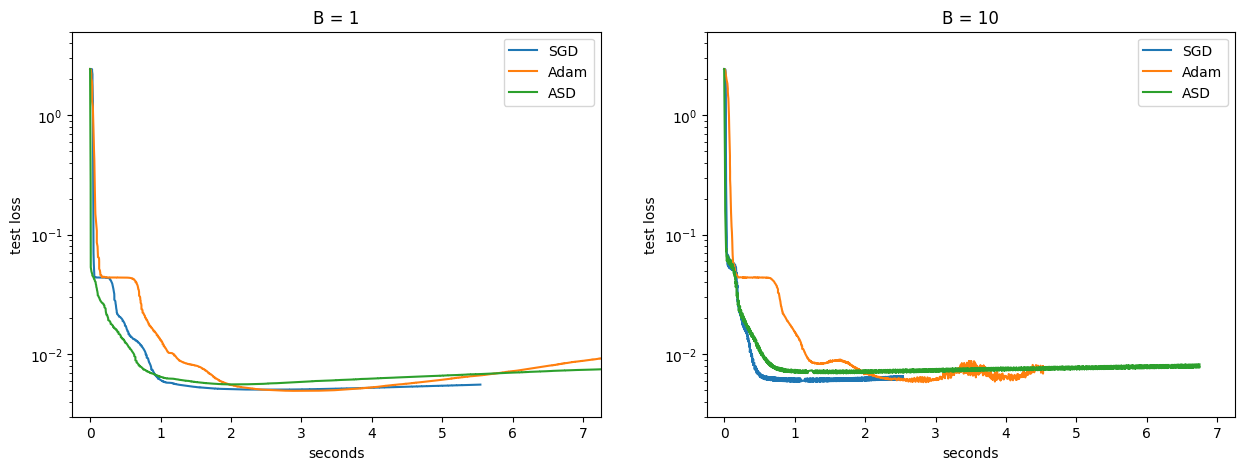

In [37]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((3e-3,5))
ax.set_xlim((-0.25,7.25))

ax = fig.add_subplot(1,2,2)
plt.semilogy(np.array(res_sgd_real_b10["timestamps"]) - res_sgd_real_b10["timestamps"][0], res_sgd_real_b10[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b10["timestamps"]) - res_adam_real_b10["timestamps"][0], res_adam_real_b10[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b10["timestamps"]) - res_asd_real_b10["timestamps"][0], res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((3e-3,5))
ax.set_xlim((-0.25,7.25))

# fig.savefig("real_test_batch_time")

(-0.25, 7.0)

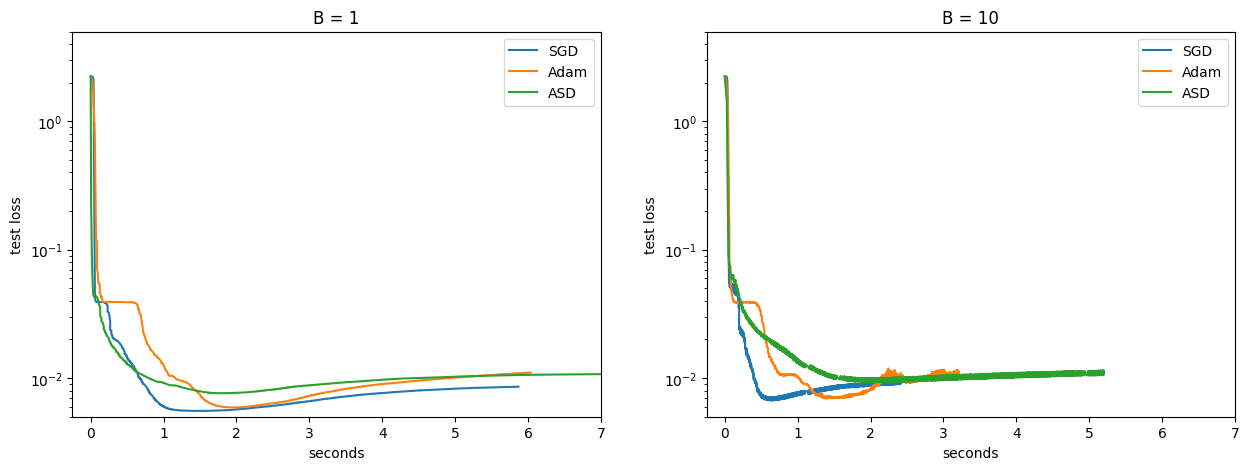

In [ ]:
loss_str = "test_loss_list"
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 1")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,7))

ax = fig.add_subplot(1,2,2)
plt.semilogy(np.array(res_sgd_real_b10["timestamps"]) - res_sgd_real_b10["timestamps"][0], res_sgd_real_b10[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b10["timestamps"]) - res_adam_real_b10["timestamps"][0], res_adam_real_b10[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b10["timestamps"]) - res_asd_real_b10["timestamps"][0], res_asd_real_b10[loss_str], label="ASD")
ax.legend(loc="upper right")
ax.set_title(f"B = 10")
ax.set_xlabel("seconds")
ax.set_ylabel("test loss")
ax.set_ylim((5e-3,5))
ax.set_xlim((-0.25,7))

# fig.savefig("real_test_batch_time")

In [36]:
# Batch test
adam_batch_test_list = []
batch_list = [1, 10, 20, 40, 80]

for B in batch_list:
    params = initial(mu, n, r) 
    optimiser = torch.optim.Adam(params, lr=0.02)   
    res = optimise(optimiser, params, Y, I, B, dk=3000, K=3000)
    adam_batch_test_list.append(res)

2999, 2078, 0.04366477578878403
2999, 2856, 0.047307562083005905
2999, 1829, 0.04812435433268547
2999, 1336, 0.0511656254529953
2999, 1524, 0.06757326424121857


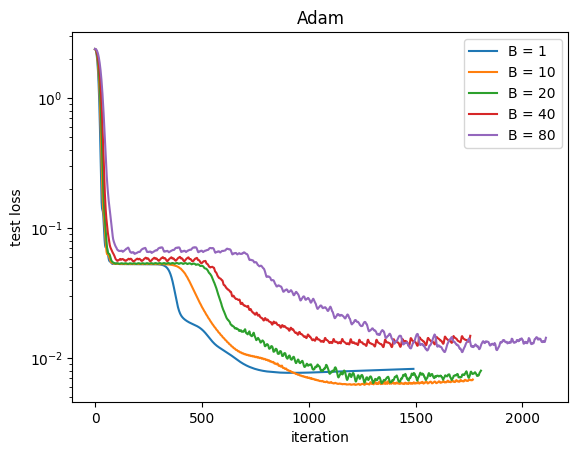

In [57]:
loss_str = "test_loss_list"
for i in range(len(adam_batch_test_list)):
    plt.semilogy(adam_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("Adam")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_adam_batch_test")

Text(0, 0.5, 'test loss')

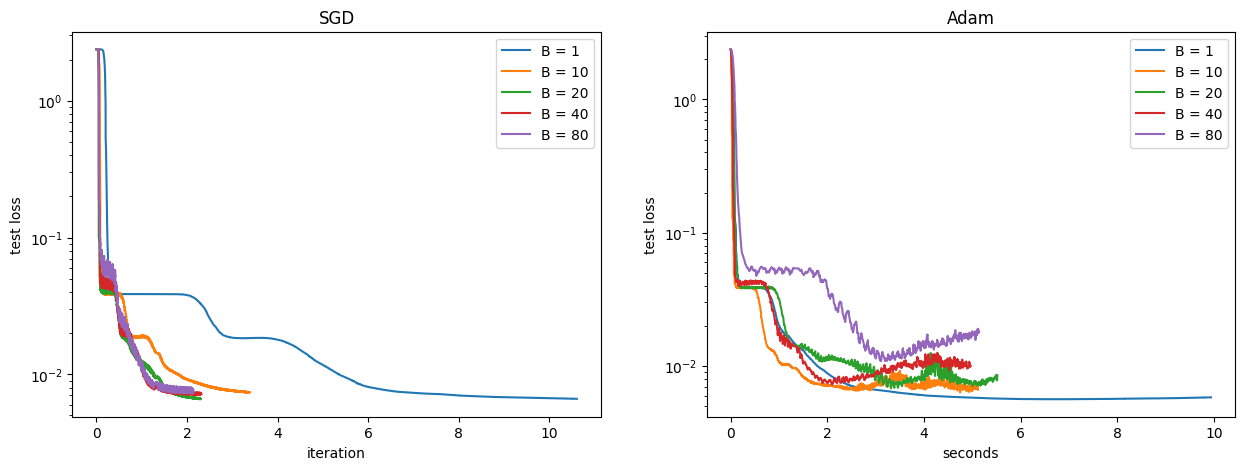

In [38]:
plt.subplot(1,2,1)
for i in range(len(sgd_batch_test_list)):
    plt.semilogy(np.array(sgd_batch_test_list[i]["timestamps"]) - sgd_batch_test_list[i]["timestamps"][0], 
                 sgd_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("SGD")
plt.xlabel("iteration")
plt.ylabel("test loss")

plt.subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(adam_batch_test_list)):
    plt.semilogy(np.array(adam_batch_test_list[i]["timestamps"]) - adam_batch_test_list[i]["timestamps"][0], 
                 adam_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("Adam")
plt.xlabel("seconds")
plt.ylabel("test loss")
# plt.savefig("real_adam_batch_test_time")

In [37]:
# Batch test
sgd_batch_test_list = []
batch_list = [1, 10, 20, 40, 80]

for B in batch_list:
    params = initial(mu, n, r) 
    optimiser = torch.optim.SGD(params, lr=8)   
    res = optimise(optimiser, params, Y, I, B, dk=3000, K=3000)
    sgd_batch_test_list.append(res)

2999, 2999, 0.044128526002168655
2999, 2993, 0.04484584182500839
2999, 2980, 0.04618974030017853
2999, 2971, 0.045945506542921066
2999, 2982, 0.04828041419386864


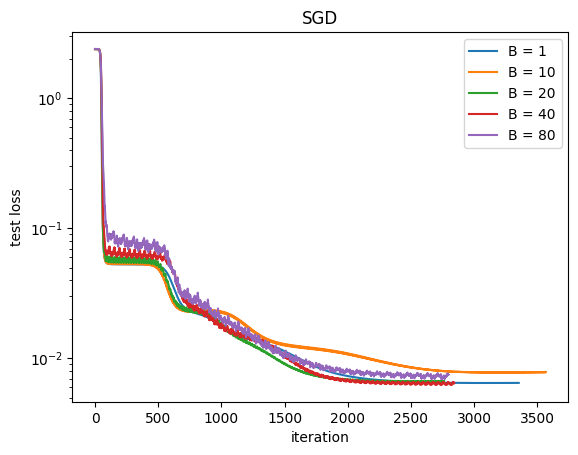

In [60]:
loss_str = "test_loss_list"
for i in range(len(sgd_batch_test_list)):
    plt.semilogy(sgd_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("SGD")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_sgd_batch_test")

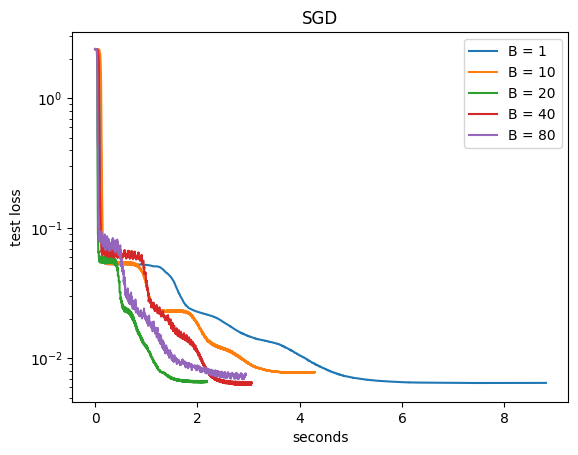

In [61]:
loss_str = "test_loss_list"
for i in range(len(sgd_batch_test_list)):
    plt.semilogy(np.array(sgd_batch_test_list[i]["timestamps"]) - sgd_batch_test_list[i]["timestamps"][0], 
                 sgd_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("SGD")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("real_sgd_batch_test_time")

In [38]:
# Batch test
asd1_batch_test_list = []
batch_list = [1, 10, 20, 40, 80]

for B in batch_list:
    U,W = initial(mu, n, r) 
    res = asd_1(U,W,Y,I,B,dk=2000,K=2000)
    asd1_batch_test_list.append(res)

1999, 442, 0.045001644641160965
1999, 1995, 0.048048343509435654
1999, 62, 0.14250604808330536
1999, 34, 0.22143545746803284
1999, 54, 0.223968505859375


In [48]:
# Batch test
asd2_batch_test_list = []
batch_list = [1, 10, 20, 40, 80]

for B in batch_list:
    U,W = initial(mu, n, r) 
    res = asd_2(U,W,Y,I,B,dk=2000,K=2000)
    asd2_batch_test_list.append(res)

1999, 424, 0.044070690870285034
1999, 1991, 0.048916175961494446
1999, 1989, 0.047012809664011
1999, 1978, 0.053388334810733795
1999, 1224, 0.08262872695922852


Text(0, 0.5, 'test loss')

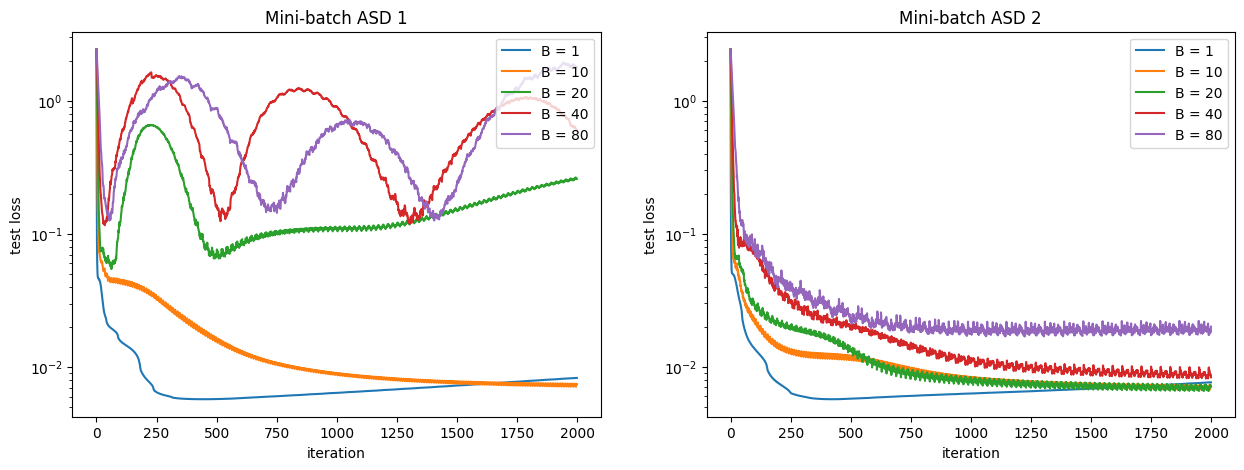

In [49]:
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,2,1)
loss_str = "test_loss_list"
for i in range(len(asd1_batch_test_list)):
    plt.semilogy(asd1_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("Mini-batch ASD 1")
plt.xlabel("iteration")
plt.ylabel("test loss")

plt.subplot(1,2,2)
loss_str = "test_loss_list"
for i in range(len(asd2_batch_test_list)):
    plt.semilogy(asd2_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("Mini-batch ASD 2")
plt.xlabel("iteration")
plt.ylabel("test loss")
# plt.savefig("real_asd_batch_test")

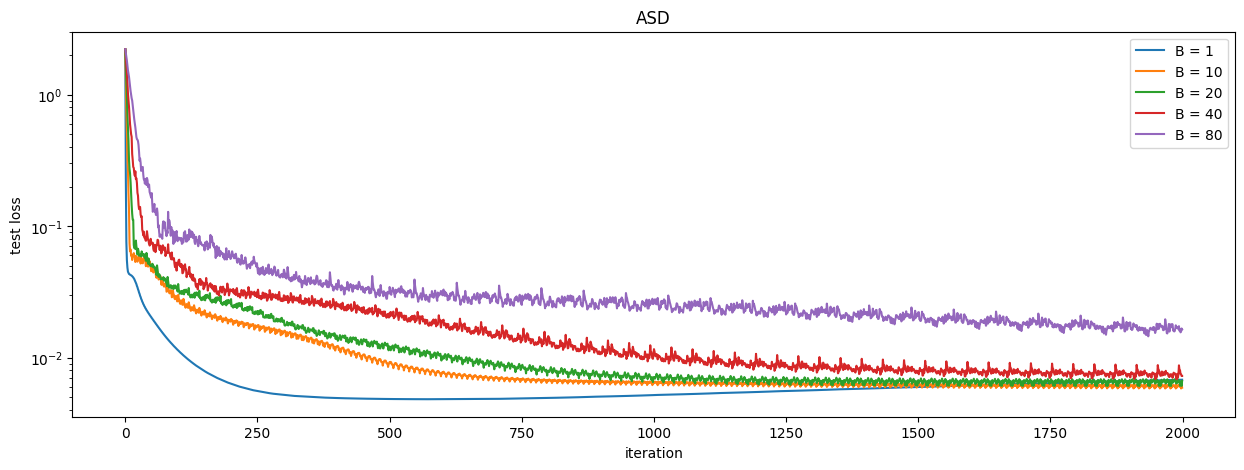

In [17]:
loss_str = "test_loss_list"
for i in range(len(asd2_batch_test_list)):
    plt.semilogy(asd2_batch_test_list[i][loss_str], label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("ASD")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_asd_batch_test")

Text(0, 0.5, 'test loss')

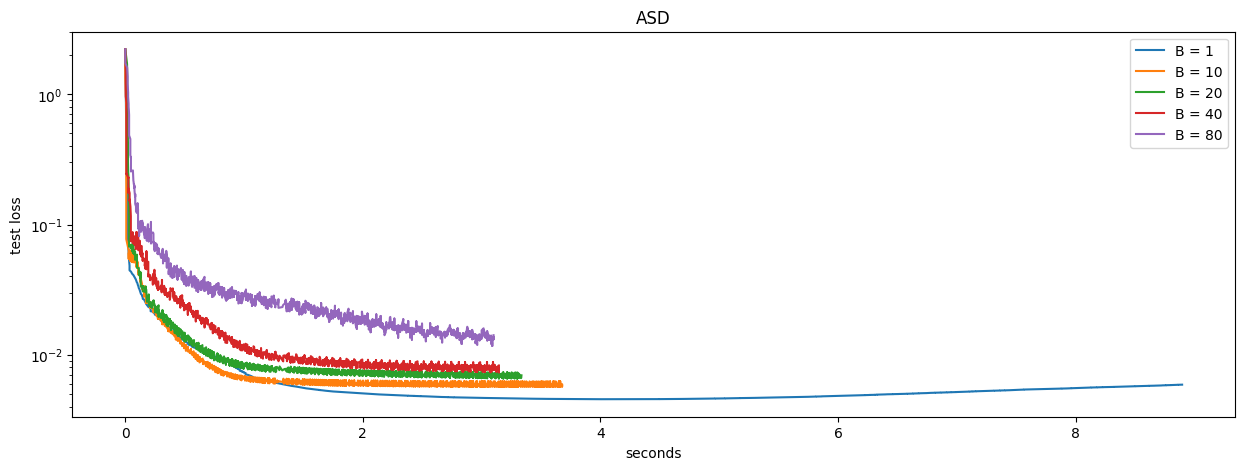

In [14]:
loss_str = "test_loss_list"
for i in range(len(asd2_batch_test_list)):
    plt.semilogy(np.array(asd2_batch_test_list[i]["timestamps"]) - asd2_batch_test_list[i]["timestamps"][0], 
                 asd2_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("ASD")
plt.xlabel("seconds")
plt.ylabel("test loss")
# plt.savefig("real_asd_batch_test_time")

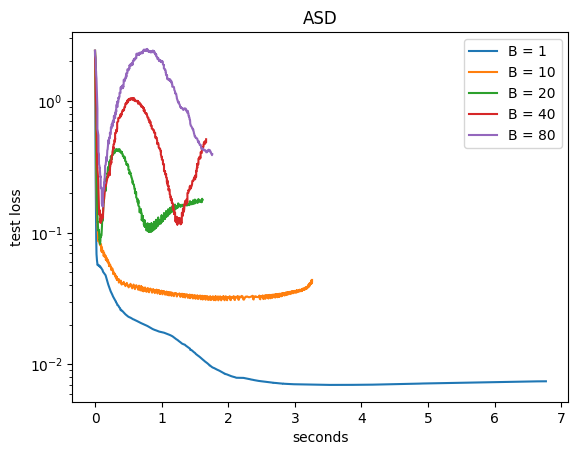

In [ ]:
loss_str = "test_loss_list"
for i in range(len(asd_batch_test_list)):
    plt.semilogy(np.array(asd_batch_test_list[i]["timestamps"]) - asd_batch_test_list[i]["timestamps"][0], 
                 asd_batch_test_list[i][loss_str], 
                 label=f"B = {batch_list[i]}")
plt.legend(loc="upper right")
plt.title("ASD")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("real_asd_batch_test_time")

In [31]:
# Adam real data
params = initial(mu, n, r) 
optimiser = torch.optim.Adam(params, lr=0.09)
res_adam_real = optimise(optimiser, params, Y, I, B, dk=2000, K=4000)

2196, 2122, 0.0638582706451416


In [32]:
# SGD real data.
params = initial(mu, n, r) 
optimiser = torch.optim.SGD(params, lr=32)
res_sgd_real = optimise(optimiser, params, Y, I, B, dk=2000, K=4000)

2583, 1031, 0.042535390704870224


In [33]:
# ASD real data.
U,W = initial(mu, n, r) 
res_asd_real = asd(U,W,Y,I,B,dk=2000,K=4000)

3279, 2143, 0.051500920206308365


Text(0, 0.5, 'test loss')

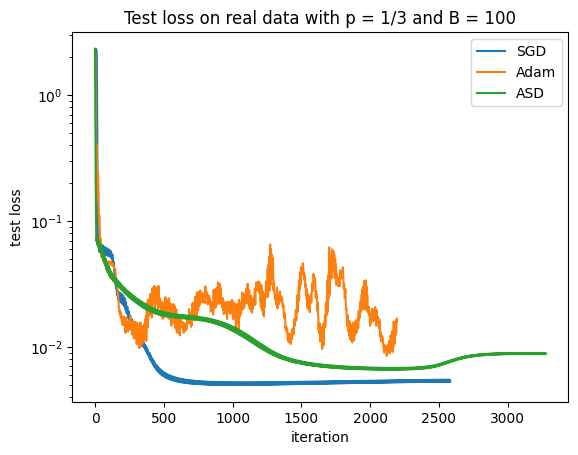

In [34]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data with p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("test loss")
# plt.savefig("real_test_b100")

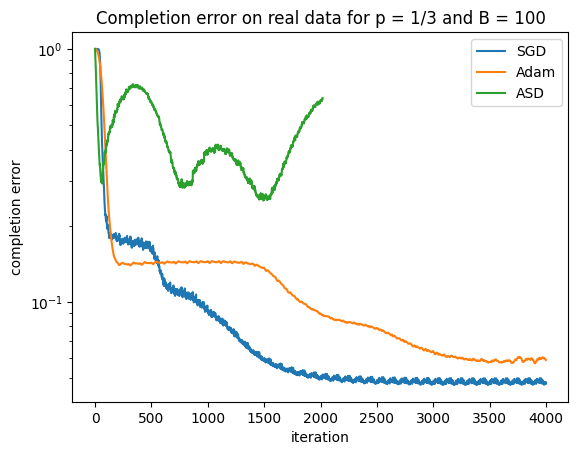

In [70]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_real[loss_str], label="SGD")
plt.semilogy(res_adam_real[loss_str], label="Adam")
plt.semilogy(res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data for p = 1/3 and B = 100")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("real_err_b100")

Text(0, 0.5, 'test loss')

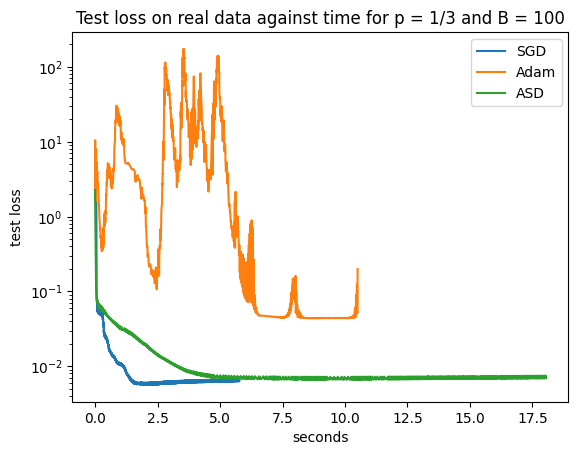

In [29]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_real["timestamps"]) - res_sgd_real["timestamps"][0], res_sgd_real[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real["timestamps"]) - res_adam_real["timestamps"][0], res_adam_real[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real["timestamps"]) - res_asd_real["timestamps"][0], res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("test loss")
# plt.savefig("real_test_b100_time")

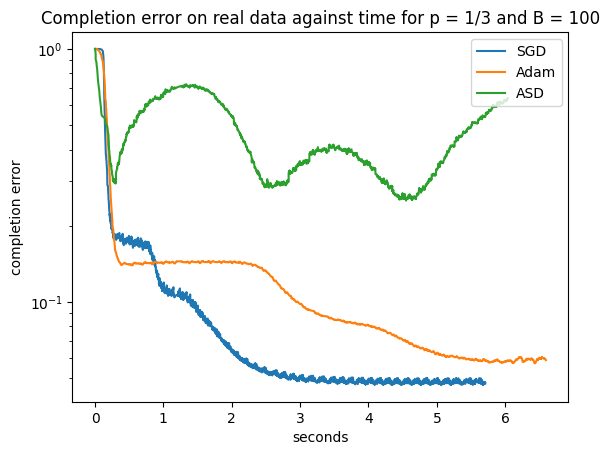

In [72]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_real["timestamps"]) - res_sgd_real["timestamps"][0], res_sgd_real[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real["timestamps"]) - res_adam_real["timestamps"][0], res_adam_real[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real["timestamps"]) - res_asd_real["timestamps"][0], res_asd_real[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data against time for p = 1/3 and B = 100")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("real_err_b100_time")

In [73]:
#1 batch real data
B = 1

In [74]:
# Adam real data
params = initial(mu, n, r) 
optimiser = torch.optim.Adam(params, lr=0.99)
res_adam_real_b1 = optimise(optimiser, params, Y, I, B, dk=500, K=2000)

651, 277, 0.04424195736646652


In [76]:
# SGD real data.
params = initial(mu, n, r) 
optimiser = torch.optim.SGD(params, lr=32) 
res_sgd_real_b1 = optimise(optimiser, params, Y, I, B, dk=100, K=2000)

1227, 1227, 0.04064648598432541


In [77]:
# ASD real data.
U,W = initial(mu, n, r) 
res_asd_real_b1 = asd(U,W,Y,I,B,dk=500,K=2000)#, lr=24)

792, 447, 0.04190291091799736


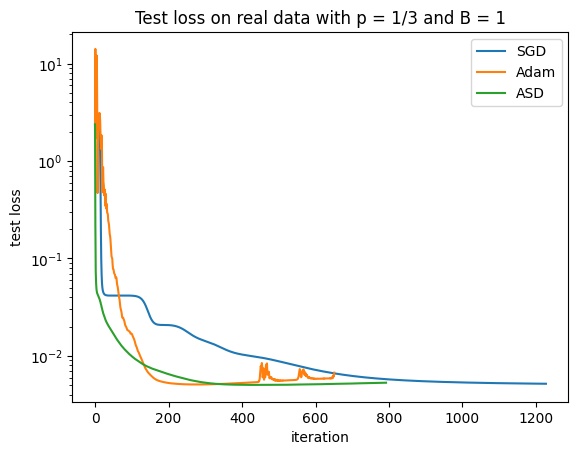

In [78]:
loss_str = "test_loss_list"
plt.semilogy(res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data with p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("test loss")
plt.savefig("real_test_b1")

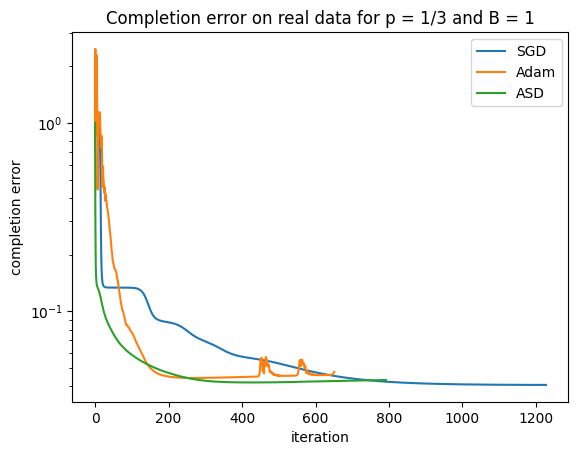

In [79]:
loss_str = "true_err_list"
plt.semilogy(res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data for p = 1/3 and B = 1")
plt.xlabel("iteration")
plt.ylabel("completion error")
plt.savefig("real_err_b1")

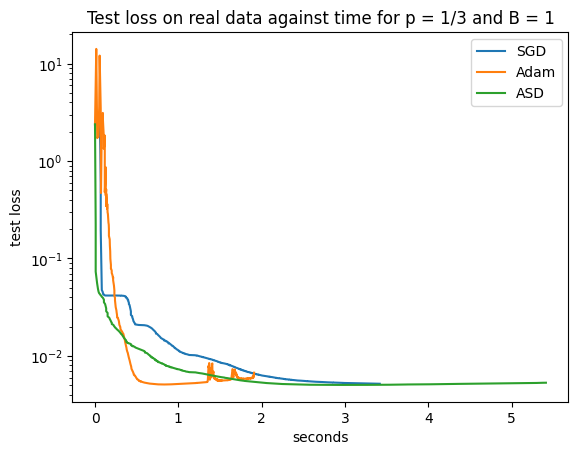

In [80]:
loss_str = "test_loss_list"
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Test loss on real data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("test loss")
plt.savefig("real_test_b1_time")

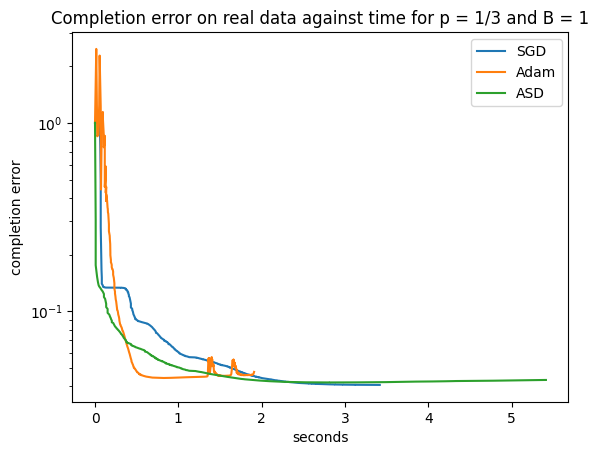

In [81]:
loss_str = "true_err_list"
plt.semilogy(np.array(res_sgd_real_b1["timestamps"]) - res_sgd_real_b1["timestamps"][0], res_sgd_real_b1[loss_str], label="SGD")
plt.semilogy(np.array(res_adam_real_b1["timestamps"]) - res_adam_real_b1["timestamps"][0], res_adam_real_b1[loss_str], label="Adam")
plt.semilogy(np.array(res_asd_real_b1["timestamps"]) - res_asd_real_b1["timestamps"][0], res_asd_real_b1[loss_str], label="ASD")
plt.legend(loc="upper right")
plt.title("Completion error on real data against time for p = 1/3 and B = 1")
plt.xlabel("seconds")
plt.ylabel("completion error")
plt.savefig("real_err_b1_time")

In [87]:
lim = int(I.shape[0]/(mu+n))
lim

15

In [15]:
B = 10

In [53]:
# Rank test: rank 5 has best completion error
adam_mean_list = []
adam_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        params = initial(mu, n, r) 
        optimiser = torch.optim.Adam(params, lr=0.02)
        res = optimise(optimiser, params, Y, I, 10, dk=1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    adam_mean_list.append(np.mean(err_list))
    adam_sd_list.append(np.std(err_list))

1
1135, 1133, 0.13369989395141602
1122, 151, 0.1334901750087738
1140, 201, 0.13465933501720428
1131, 152, 0.13491621613502502
1131, 150, 0.13435953855514526
2
2063, 2017, 0.09321632236242294
1970, 1137, 0.08918870985507965
1898, 1015, 0.08970867097377777
1836, 940, 0.09071354568004608
1790, 917, 0.09008863568305969
3
1705, 894, 0.07204263657331467
1673, 825, 0.07138174027204514
1716, 793, 0.0736759752035141
1896, 1351, 0.07429323345422745
2309, 1694, 0.07467174530029297
4
1790, 1011, 0.05904851853847504
1661, 939, 0.05789673328399658
1781, 890, 0.06138138473033905
1777, 1007, 0.0571138933300972
1853, 1049, 0.059238728135824203
5
1952, 1459, 0.03964409977197647
2125, 1724, 0.04372365400195122
1962, 1382, 0.04189474508166313
2035, 1677, 0.043265774846076965
1931, 1210, 0.041627831757068634
6
1769, 1209, 0.041477471590042114
1844, 1608, 0.03865894675254822
1871, 1272, 0.044467825442552567
1870, 1408, 0.039788972586393356
1810, 1171, 0.042076777666807175
7
2059, 1937, 0.04407186433672905
1

In [54]:
# Rank test: rank 5 has best completion error
sgd_mean_list = []
sgd_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        params = initial(mu, n, r) 
        optimiser = torch.optim.SGD(params, lr=32)
        res = optimise(optimiser, params, Y, I, 10, dk=1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    sgd_mean_list.append(np.mean(err_list))
    sgd_sd_list.append(np.std(err_list))

1
1074, 337, 0.1413027048110962
1047, 458, 0.1423124521970749
1038, 413, 0.14352135360240936
1033, 416, 0.14196157455444336
1064, 398, 0.1433907449245453
2
1177, 223, 0.09572811424732208
1186, 268, 0.09594056010246277
1171, 199, 0.09720640629529953
1293, 974, 0.09748804569244385
1162, 178, 0.09582982212305069
3
1233, 295, 0.07319588959217072
1309, 470, 0.07399284839630127
1261, 328, 0.07624875754117966
1271, 361, 0.07497522234916687
1261, 343, 0.07380448281764984
4
1269, 397, 0.06234823167324066
1472, 744, 0.061284296214580536
1429, 1424, 0.06852664798498154
1333, 536, 0.06179554760456085
1326, 509, 0.06557095795869827
5
1685, 951, 0.0414438433945179
1635, 895, 0.04182622954249382
1463, 648, 0.04546353220939636
1580, 1034, 0.042338721454143524
1328, 437, 0.06198538839817047
6
1613, 917, 0.04308943822979927
1837, 1311, 0.04138588905334473
1829, 1339, 0.04053957387804985
1652, 949, 0.039557792246341705
2663, 2659, 0.04085979238152504
7
2215, 1717, 0.043431177735328674
1866, 1644, 0.03936

In [52]:
# Rank test: rank 5 has best completion error
asd_mean_list = []
asd_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        U,W = initial(mu, n, r) 
        res = asd_2(U, W, Y, I, 10, 1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    asd_mean_list.append(np.mean(err_list))
    asd_sd_list.append(np.std(err_list))

1
1012, 16, 0.15687429904937744
1028, 347, 0.15297850966453552
1018, 43, 0.1539524644613266
1011, 355, 0.15121610462665558
1012, 45, 0.1517561972141266
2
1541, 1539, 0.09706148505210876
1007, 29, 0.1567658632993698
1151, 226, 0.09947195649147034
1114, 147, 0.09985954314470291
1094, 114, 0.09872034937143326
3
1125, 245, 0.08127701282501221
1149, 260, 0.08105454593896866
1697, 1136, 0.08090388774871826
1514, 775, 0.07960393279790878
1142, 227, 0.07940538227558136
4
1258, 401, 0.0664619579911232
1380, 657, 0.0659681111574173
1264, 414, 0.06565269827842712
1247, 435, 0.0654677152633667
1174, 304, 0.06551569700241089
5
1641, 952, 0.04561285302042961
1523, 733, 0.049684032797813416
1604, 1000, 0.04196175932884216
1563, 834, 0.04623110964894295
1352, 635, 0.04502936452627182
6
2101, 1594, 0.04236637428402901
2168, 1771, 0.043983981013298035
1679, 1155, 0.04495621100068092
1840, 1257, 0.05390290915966034
2999, 2994, 0.04314110428094864
7
2975, 2541, 0.04190777242183685
2999, 2998, 0.0456340499

In [58]:
# Rank test: rank 5 has best completion error
asd1_mean_list = []
asd1_sd_list = []
for r in range(1,26):
    err_list = []
    print(r)
    for _ in range(5):
        I = bernoulli(mu, n, p)
        U,W = initial(mu, n, r) 
        res = asd_1(U, W, Y, I, 10, 1000, K=3000)
        U, W = res["best_params"]
        err_list.append(completion_err(U,W,Y))
    
    asd1_mean_list.append(np.mean(err_list))
    asd1_sd_list.append(np.std(err_list))

1
1014, 33, 0.15172460675239563
1016, 240, 0.14930468797683716
1018, 29, 0.1515934020280838
1017, 46, 0.15304259955883026
1015, 30, 0.14946235716342926
2
1248, 362, 0.10148947685956955
1175, 245, 0.09909479320049286
1398, 1012, 0.10382203012704849
1192, 1186, 0.09946712106466293
1193, 237, 0.10164549201726913
3
1400, 1393, 0.08219923079013824
2999, 2999, 0.08207722753286362
1566, 853, 0.08031266927719116
1183, 412, 0.10216531157493591
2999, 2999, 0.08970014750957489
4
1681, 1167, 0.0660504400730133
1503, 678, 0.12884868681430817
2570, 2053, 0.06790120899677277
1801, 1258, 0.07453519105911255
1229, 351, 0.13089483976364136
5
1511, 983, 0.06410247832536697
1855, 1303, 0.04652942344546318
2194, 1661, 0.048144929111003876
1282, 1168, 0.06923595815896988
2999, 2853, 0.05709247291088104
6
2667, 2000, 0.06520401686429977
2840, 2530, 0.09199316799640656
2999, 2990, 0.05061884596943855
2999, 2833, 0.04933486878871918
2999, 2998, 0.061337392777204514
7
2999, 2991, 0.05722370371222496
2784, 2499,

In [55]:
asd2_mean_list = asd_mean_list
asd2_sd_list = asd_sd_list

In [ ]:
import json


data = {
    "sgd_mean_list": sgd_mean_list,
    "sgd_sd_list": sgd_sd_list,
    "adam_mean_list": adam_mean_list,
    "adam_sd_list": adam_sd_list,
    "asd1_mean_list": asd1_mean_list,
    "asd1_sd_list": asd1_sd_list,
    "asd2_mean_list": asd2_mean_list,
    "asd2_sd_list": asd2_sd_list,
}

TypeError: dump() missing 1 required positional argument: 'fp'

In [63]:
data2 = {}
for key, res in data.items():
    res2 = []
    for val in res:
        val2 = float(val)
        res2.append(val2)
    data2[key] = res2

In [1]:
import json


with open("data.json", "r") as file:
    data = json.load(file)

data

{'sgd_mean_list': [0.14249777793884277,
  0.09643858671188354,
  0.07444343715906143,
  0.06390513479709625,
  0.046611543744802475,
  0.04108649492263794,
  0.04094243422150612,
  0.03707015514373779,
  0.036931753158569336,
  0.03772089257836342,
  0.036531124264001846,
  0.03704381361603737,
  0.037557851523160934,
  0.03730003163218498,
  0.03555867448449135,
  0.036309272050857544,
  0.03691408783197403,
  0.03747578710317612,
  0.035428471863269806,
  0.03662104532122612,
  0.03344370424747467,
  0.03596460074186325,
  0.035262830555438995,
  0.03777065873146057,
  0.03727767989039421],
 'sgd_sd_list': [0.0008479571552015841,
  0.000750240869820118,
  0.0010686108144000173,
  0.002752324566245079,
  0.007817089557647705,
  0.0011652354151010513,
  0.0015915189869701862,
  0.0007418515742756426,
  0.0018601578194648027,
  0.0022690885234624147,
  0.000823538692202419,
  0.002962414873763919,
  0.0007719594286754727,
  0.0024871721398085356,
  0.0013578167418017983,
  0.00229239929

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
sgd_mean_list = data["sgd_mean_list"]
sgd_sd_list = data["sgd_sd_list"]
adam_mean_list = data["adam_mean_list"]
adam_sd_list = data["adam_sd_list"]
asd2_mean_list = data["asd2_mean_list"]
asd2_sd_list = data["asd2_sd_list"]

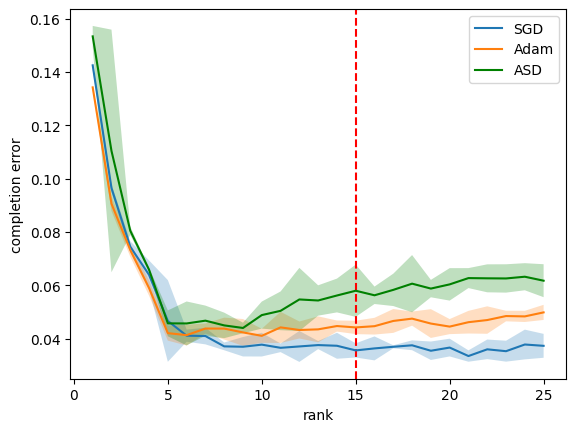

In [10]:
# Best test loss as a function of rank.
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.axvline(x=15, ls='--', c='red')

plt.plot(np.arange(1,26),sgd_mean_list, label="SGD")
sgd_upper = np.array(sgd_mean_list) + 1.96 * np.array(sgd_sd_list)
sgd_lower = np.array(sgd_mean_list) - 1.96 * np.array(sgd_sd_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.25)

plt.plot(np.arange(1,26),adam_mean_list, label="Adam")
adam_upper = np.array(adam_mean_list) + 1.96 * np.array(adam_sd_list)
adam_lower = np.array(adam_mean_list) - 1.96 * np.array(adam_sd_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.25)

# plt.plot(np.arange(1,26),asd1_mean_list, "m", label="Mini-batch ASD 1")
# asd_upper = np.array(asd1_mean_list) + 1.96 * np.array(asd1_sd_list)
# asd_lower = np.array(asd1_mean_list) - 1.96 * np.array(asd1_sd_list)
# plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="m", alpha=0.25)

plt.plot(np.arange(1,26),asd2_mean_list, "g", label="ASD")
asd_upper = np.array(asd2_mean_list) + 1.96 * np.array(asd2_sd_list)
asd_lower = np.array(asd2_mean_list) - 1.96 * np.array(asd2_sd_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, facecolor="g", alpha=0.25)

# data = []
# for res in sgd_list:
#     data.append(res["test_loss_list"][res["best_iter"]])
# plt.plot(np.arange(1,26),np.array(data), label="SGD")

plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("real_rank_test_b10")

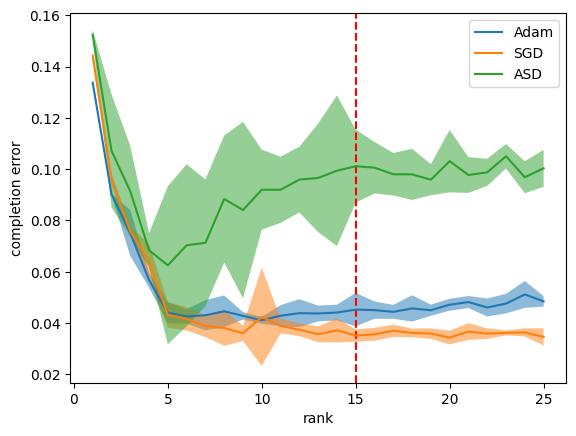

In [ ]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

plt.plot(np.arange(1,26),adam_mean_list, label="Adam")
adam_upper = np.array(adam_mean_list) + 1.96 * np.array(adam_sd_list)
adam_lower = np.array(adam_mean_list) - 1.96 * np.array(adam_sd_list)
plt.fill_between(np.arange(1,26),adam_lower, adam_upper, alpha=0.5)

plt.plot(np.arange(1,26),sgd_mean_list, label="SGD")
sgd_upper = np.array(sgd_mean_list) + 1.96 * np.array(sgd_sd_list)
sgd_lower = np.array(sgd_mean_list) - 1.96 * np.array(sgd_sd_list)
plt.fill_between(np.arange(1,26),sgd_lower, sgd_upper, alpha=0.5)

plt.plot(np.arange(1,26),asd_mean_list, label="ASD")
asd_upper = np.array(asd_mean_list) + 1.96 * np.array(asd_sd_list)
asd_lower = np.array(asd_mean_list) - 1.96 * np.array(asd_sd_list)
plt.fill_between(np.arange(1,26),asd_lower, asd_upper, alpha=0.5)

# data = []
# for res in sgd_list:
#     data.append(res["test_loss_list"][res["best_iter"]])
# plt.plot(np.arange(1,26),np.array(data), label="SGD")

plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
# plt.savefig("real_rank_test_b10")

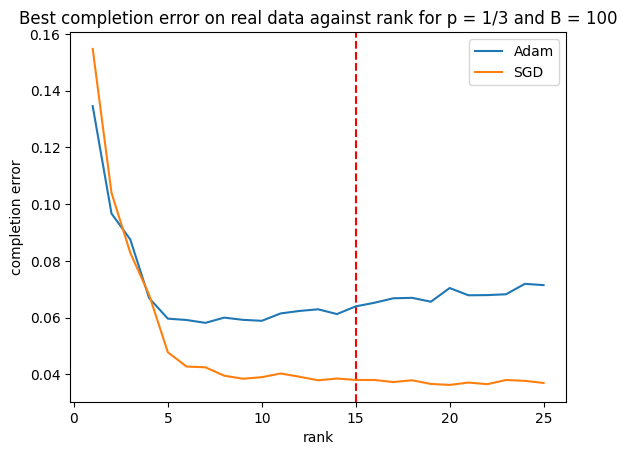

In [58]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

data = []
for res in adam_list:
    data.append(res["true_err_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="Adam")

data = []
for res in sgd_list:
    data.append(res["true_err_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="SGD")

plt.title("Best completion error on real data against rank for p = 1/3 and B = 100")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("real_rank_err_b100")

In [26]:
# Rank test: rank 5 has best completion error
adam_b1_list = []

for i in range(1,26):
    params = initial(mu, n, i) 
    optimiser = torch.optim.Adam(params, lr=0.99)
    res = optimise(optimiser, params, Y, I, 1, dk=200, K=1000)
    adam_b1_list.append(res)

266, 76, 0.13371457159519196
275, 88, 0.09260618686676025
281, 86, 0.07452703267335892
350, 169, 0.06853149831295013
386, 240, 0.04153648763895035
497, 375, 0.04003520309925079
670, 551, 0.04198868200182915
502, 373, 0.038493622094392776
652, 596, 0.036762602627277374
833, 765, 0.03814779594540596
526, 451, 0.040558185428380966
654, 592, 0.040277149528265
561, 430, 0.03930669650435448
710, 635, 0.03687014430761337
999, 999, 0.038110435009002686
894, 894, 0.03833097219467163
939, 939, 0.03715156763792038
999, 999, 0.0365370512008667
999, 999, 0.03554400056600571
810, 810, 0.037326082587242126
984, 984, 0.03682192042469978
999, 999, 0.03610186278820038
975, 975, 0.035713158547878265
908, 908, 0.03815339133143425
999, 999, 0.03855032101273537


In [29]:
# Rank test: rank 10 has best completion error
sgd_b1_list = []

for i in range(1, 26):
    params = initial(mu, n, i) 
    optimiser = torch.optim.SGD(params, lr=32)
    res = optimise(optimiser, params, Y, I, 1, dk=200, K=1000)
    sgd_b1_list.append(res)

226, 33, 0.13334189355373383
380, 213, 0.08892136067152023
463, 308, 0.07178782671689987
573, 444, 0.056332144886255264
908, 873, 0.04066816344857216
822, 822, 0.040755193680524826
848, 792, 0.040461186319589615
999, 999, 0.037216413766145706
999, 999, 0.03899125009775162
999, 999, 0.036308374255895615
999, 999, 0.036981403827667236
999, 999, 0.0365467295050621
999, 999, 0.036769453436136246
999, 999, 0.03638678044080734
999, 999, 0.036941882222890854
999, 999, 0.03541422635316849
999, 999, 0.03589271381497383
999, 999, 0.03612545132637024
999, 999, 0.035327911376953125
999, 999, 0.035281985998153687
999, 999, 0.03581010177731514
999, 999, 0.03579119220376015
999, 999, 0.035815972834825516
999, 999, 0.03549674153327942
999, 999, 0.035578127950429916


In [30]:
asd_b1_list = []

for i in range(1,26):
    U,W = initial(mu, n, i) 
    res = asd(U, W, Y, I, 1, 200, K=1000)
    asd_b1_list.append(res)

206, 19, 0.13332486152648926
240, 51, 0.08960705250501633
260, 128, 0.07187480479478836
529, 464, 0.06124117597937584
402, 287, 0.042033806443214417
962, 871, 0.045383282005786896
999, 998, 0.044446274638175964
999, 999, 0.04258595407009125
619, 574, 0.05420359596610069
886, 886, 0.054496344178915024
530, 519, 0.056883081793785095
423, 409, 0.06333725154399872
462, 429, 0.06145079806447029
422, 368, 0.07088357955217361
450, 450, 0.07098480314016342
387, 352, 0.06908419728279114
328, 225, 0.06894668191671371
337, 319, 0.06835036724805832
350, 350, 0.08229836821556091
494, 494, 0.07118508219718933
374, 374, 0.06716467440128326
389, 386, 0.07739365845918655
371, 347, 0.07365907728672028
349, 348, 0.07747899740934372
446, 446, 0.07293226569890976


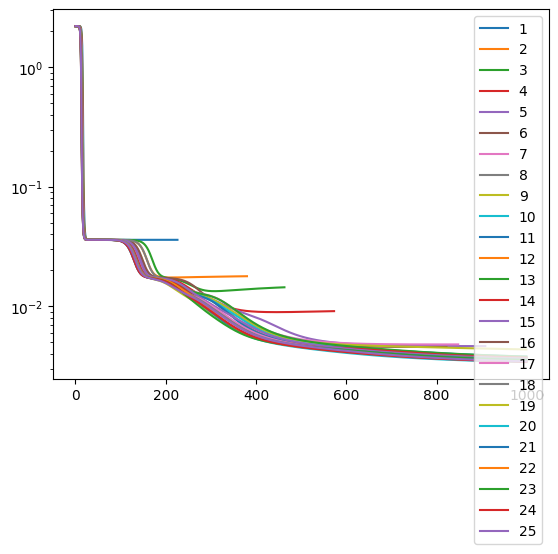

In [32]:
for i in range(len(sgd_b1_list)):
    plt.semilogy(sgd_b1_list[i]["test_loss_list"], label=f"{i+1}")
plt.legend(loc="upper right")

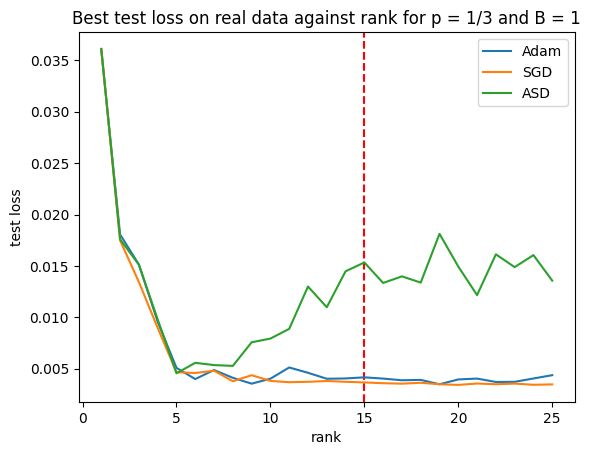

In [56]:
# Best test loss as a function of rank.
plt.axvline(x=15, ls='--', c='red')

data = []
for res in adam_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="Adam")

data = []
for res in sgd_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="SGD")

data = []
for res in asd_b1_list:
    data.append(res["test_loss_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="ASD")

plt.title("Best test loss on real data against rank for p = 1/3 and B = 1")
plt.xlabel("rank")
plt.ylabel("test loss")
plt.legend(loc="upper right")
plt.savefig("real_rank_test_b1")

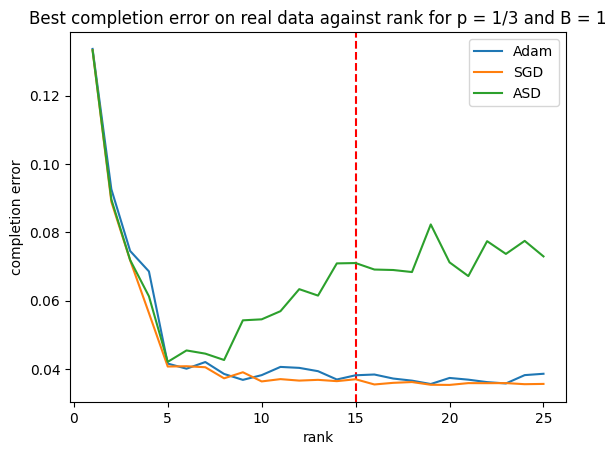

In [57]:
# Best completion error as a function of rank.
plt.axvline(x=15, ls='--', c='red')

data = []
for res in adam_b1_list:
    data.append(res["true_err_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="Adam")

data = []
for res in sgd_b1_list:
    data.append(res["true_err_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="SGD")

data = []
for res in asd_b1_list:
    data.append(res["true_err_list"][res["best_iter"]])
plt.plot(np.arange(1,26),np.array(data), label="ASD")

plt.title("Best completion error on real data against rank for p = 1/3 and B = 1")
plt.xlabel("rank")
plt.ylabel("completion error")
plt.legend(loc="upper right")
plt.savefig("real_rank_err_b1")